## Name: Itunuoluwa Abidoye 202136265

## Course Name: Artificial Inteligence and Data Science

## Course Code: 771763_A23_T1

Your goal for this exercise is to develop a CNN model that will identify the species of a
flower from a photograph. You should write up your results in the style of a scientific report.
Your report should address the following questionuitable figures.

a. Describe the architecture of the CNN model that you used (for example, the number
and types of layers that you used, the activation functions that you used etc), and
discuss your justifications for the choices that you made.

b. Describe the regularisation methods that you used in your CNN model. How do they
affect the accuracy of your results?


c. Discuss any other hyperparameter tuning that you undertook to optimize your
model. Which hyperparameters have the strongest effect on the performance of
your model? Use suitable figures to visualize the accuracy and performance of your
final model.

d. Was there any evidence of overfitting in any of your models? Justify your answer
with suitable figures.

## Section 2 

## Image Classification Using Flowers

In [1]:
import os
import shutil
import sklearn as sk
import numpy as np
import keras
import pandas as pd
import seaborn as sns
import tensorflow
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
from tensorflow.keras.utils import image_dataset_from_directory 

#load images from my directory directory

#handing error while loading theflower photos directory
try:
    flower_dir = "flower_photos" # flowerpath 
except FileNotFoundError as not_found: # File not found error 
    print(f"The file at path '{flower_dir}' could not be found.")
except IOError as opening_error:
    print(f"An error occurred while trying to open the file: {opening_error}")
except Exception as exception:
    print(f"An unexpected error occurred: {exception}")

 # Image directory name

#train dataset
train_dataset = image_dataset_from_directory(flower_dir,validation_split = 0.1, subset = "training",
                                        seed = 42, batch_size = None)

#test dataset
test_dataset = image_dataset_from_directory(flower_dir,validation_split = 0.1, subset = "validation",
                                       seed = 42, batch_size = None)
#trained data
x_train = [] 
y_train = []  


for x, y in train_dataset:
    x_train.append(np.uint8(x.numpy()))
    y_train.append(y.numpy())

x_train = np.array(x_train)
y_train = np.array(y_train)

#test data
x_test = []
y_test = []

for x, y in test_dataset:
    x_test.append(np.uint8(x.numpy()))
    y_test.append(y.numpy())

x_test = np.array(x_test)
y_test = np.array(y_test)

print(train_dataset.class_names)

Found 3670 files belonging to 5 classes.
Using 3303 files for training.
Found 3670 files belonging to 5 classes.
Using 367 files for validation.
['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [3]:
# size of these arrays in each dimension. 
#This will print a tuple containing the size of the array in each dimension. The first number
#gives how many images are contained in the array. The second and third number gives the
#width and height of each image in pixels

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3303, 256, 256, 3)
(3303,)
(367, 256, 256, 3)
(367,)


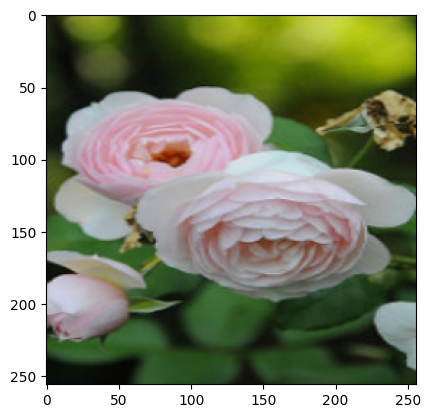

In [4]:
# plot the first image

plt.imshow(x_train[0])

In [5]:
#Converting the y_train and y_test arrays

y_train_cat = keras.utils.to_categorical(y_train)
y_test_cat = keras.utils.to_categorical(y_test)


#normalising the input image arrays so that the pixel values are between 0 and 1.

x_train_norm = x_train/255
x_test_norm = x_test/255

#x_train
#x_test

print (x_train_norm.shape)
print (x_test_norm.shape)

# Record the width and height of
# each image, in pixels.
width_npix = x_train_norm.shape[1]
height_npix = x_train_norm.shape[2]

(3303, 256, 256, 3)
(367, 256, 256, 3)


In [6]:
# Import the ImageDataGenerator class from tensorflow.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# data augmentation parameters
train_datagen = ImageDataGenerator(
rotation_range = 20, # Randomly rotate images up to 20 degrees
width_shift_range = 0.1, # Randomly shift images horizontally up to 10% of the width
height_shift_range = 0.1, # Randomly shift images vertically up to 10% of the height
horizontal_flip = True, # Randomly flip images horizontally
vertical_flip = False, # Don't randomly flip images vertically
shear_range = 0.10, # crops part of the image
zoom_range = 0.10, # #zooms the image by 10%
validation_split = 0.2 # Set the validation split 20%
)

# Fitting the transformation to the training dataset
train_datagen.fit(x_train_norm)

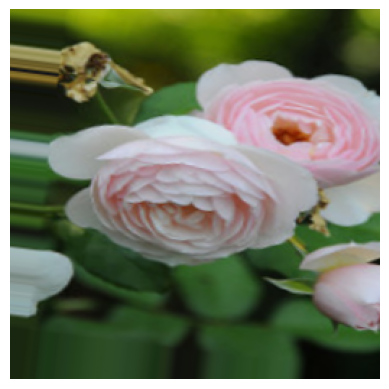

In [7]:
# Apply the random_transform function to the first image

new_image = train_datagen.random_transform(x_train_norm[0])

# to show this image.
plt.imshow(new_image)

plt.gca().axis("off")
# Show the figure.
plt.show()


 ## Image Classification with a CNN Model

## Model 1

In [8]:
# Import the Sequential model from Tensor Flow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten, Dense, Dropout
# Import the layers that we will require from Tensor Flow.
# Create an instance of the Sequential class.
#  model.
model = Sequential()
# Add the first Convolutional layer. Here we use 32 filters,
# which will each be convolved with the input data to
# produce 32 feature maps. We use a kernel_size of 3x3,
# and the relu activation function.
model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (width_npix,height_npix, 3), activation = 'relu'))
# Add a pooling layer that uses max pooling,
# with a pool size of 2x2.
model.add(MaxPooling2D(pool_size = (2, 2)))
# Add a second convolutional layer, again with a kernel size of 3x3 and
# the relu activation function but now with 64 filters.
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
# Add a second max pooling layer.
model.add(MaxPooling2D(pool_size = (2, 2)))
# Add a third convolutional layer, now with 128 filters.
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
# Add a third max pooling layer.
model.add(MaxPooling2D(pool_size = (2, 2)))
# After the final pooling layer, we need a flatter layer,
# which will flatten the output to a 1-dimensional array,
# ready for the fully connected network.
model.add(Flatten())
# Add a Dense (i.e. fully connected) layer with 64 neurons
# and the relu activation function.
model.add(Dense(64, activation = 'relu'))
# Apply a dropout rate of 50% to the dense layer.
model.add(Dropout(0.5))
# The output layer needs 5 units, corresponding
# to the 5 output classes. 
model.add(Dense(5, activation = 'softmax'))
# summary of the model.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [9]:
from tensorflow.keras.optimizers import Adam
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from sklearn.metrics import classification_report

# Function for plotting, training and validation loss

def plotEvaluation_loss(history_df):
    plt.plot(history_df["loss"], label="Training Loss")
    plt.plot(history_df["val_loss"], label="Validation Loss")
    plt.title("Training Loss vs Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

# Function for plotting training and validation accuracy
def plotEvaluation_accuracy(history_df):
    plt.plot(history_df["accuracy"], label="Training Accuracy")
    plt.plot(history_df["val_accuracy"], label="Validation Accuracy")
    plt.title("Training Accuracy vs Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

# Main training and evaluation function
def train_and_evaluate(model, batch_size, x_train_norm, y_train_cat, x_test_norm, y_test, train_datagen):
    # Compile the CNN model
    adam_optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=adam_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Set the train the model
    history = model.fit(train_datagen.flow(x_train_norm, y_train_cat, batch_size=batch_size, subset="training"),
                        epochs=20, validation_data=train_datagen.flow(x_train_norm, y_train_cat,
                        batch_size=batch_size, subset="validation"))
    
    # Convert the history to a Pandas dataframe
    history_df = pd.DataFrame(history.history)
    
    # Plot the training and validation loss
    plotEvaluation_loss(history_df)
    
    # Plot the training and validation accuracy
    plotEvaluation_accuracy(history_df)
    
    # Define labels
    display_labels = ["%d" % (i,) for i in range(5)]
    numerical_labels = [i for i in range(5)]
    
    print(display_labels)
    print(numerical_labels)
    
    # Predict the test set results and plot the confusion matrix
    y_pred = model.predict(x_test_norm)
    y_pred_class = np.argmax(y_pred, axis=1)
    
    con_mat = confusion_matrix(y_test, y_pred_class, labels=numerical_labels)
    plt.figure(figsize=(8, 6), dpi=300)
    ax = plt.axes()
    disp = ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=display_labels)
    plt.title("Confusion Matrix Plot")
    disp.plot(ax=ax)
    plt.show()
    
    
    # Print the classification report, using the predicted class
    # labels for the testing set obtained from the final model.
    print(classification_report(y_test, y_pred_class))

    
    return history


Epoch 1/20
83/83 [==============================] - 51s 612ms/step - loss: 1.4823 - accuracy: 0.3651 - val_loss: 1.2321 - val_accuracy: 0.4697
Epoch 2/20
83/83 [==============================] - 51s 619ms/step - loss: 1.2390 - accuracy: 0.4771 - val_loss: 1.0669 - val_accuracy: 0.5727
Epoch 3/20
83/83 [==============================] - 52s 629ms/step - loss: 1.1125 - accuracy: 0.5422 - val_loss: 0.9927 - val_accuracy: 0.6258
Epoch 4/20
83/83 [==============================] - 53s 632ms/step - loss: 1.0548 - accuracy: 0.5804 - val_loss: 0.9192 - val_accuracy: 0.6333
Epoch 5/20
83/83 [==============================] - 52s 619ms/step - loss: 0.9890 - accuracy: 0.5925 - val_loss: 0.8976 - val_accuracy: 0.6409
Epoch 6/20
83/83 [==============================] - 53s 638ms/step - loss: 0.9524 - accuracy: 0.6239 - val_loss: 0.8384 - val_accuracy: 0.6788
Epoch 7/20
83/83 [==============================] - 56s 676ms/step - loss: 0.9258 - accuracy: 0.6447 - val_loss: 0.8115 - val_accuracy: 0.6879

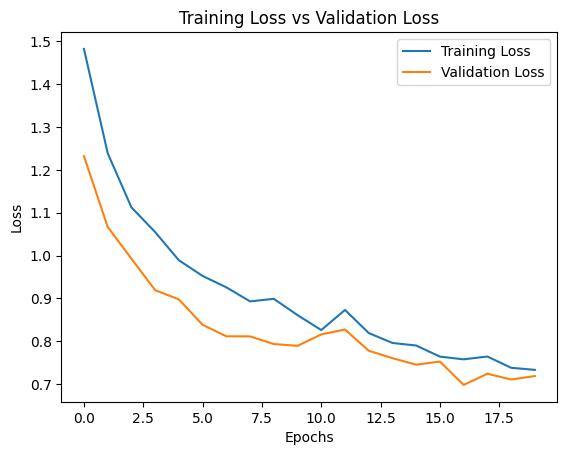

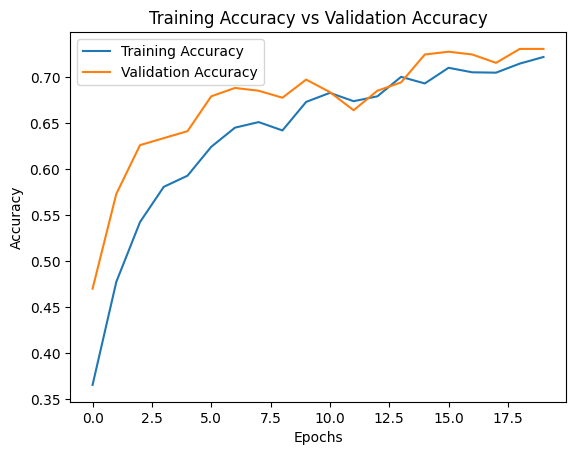

['0', '1', '2', '3', '4']
[0, 1, 2, 3, 4]
12/12 [==============================] - 1s 113ms/step


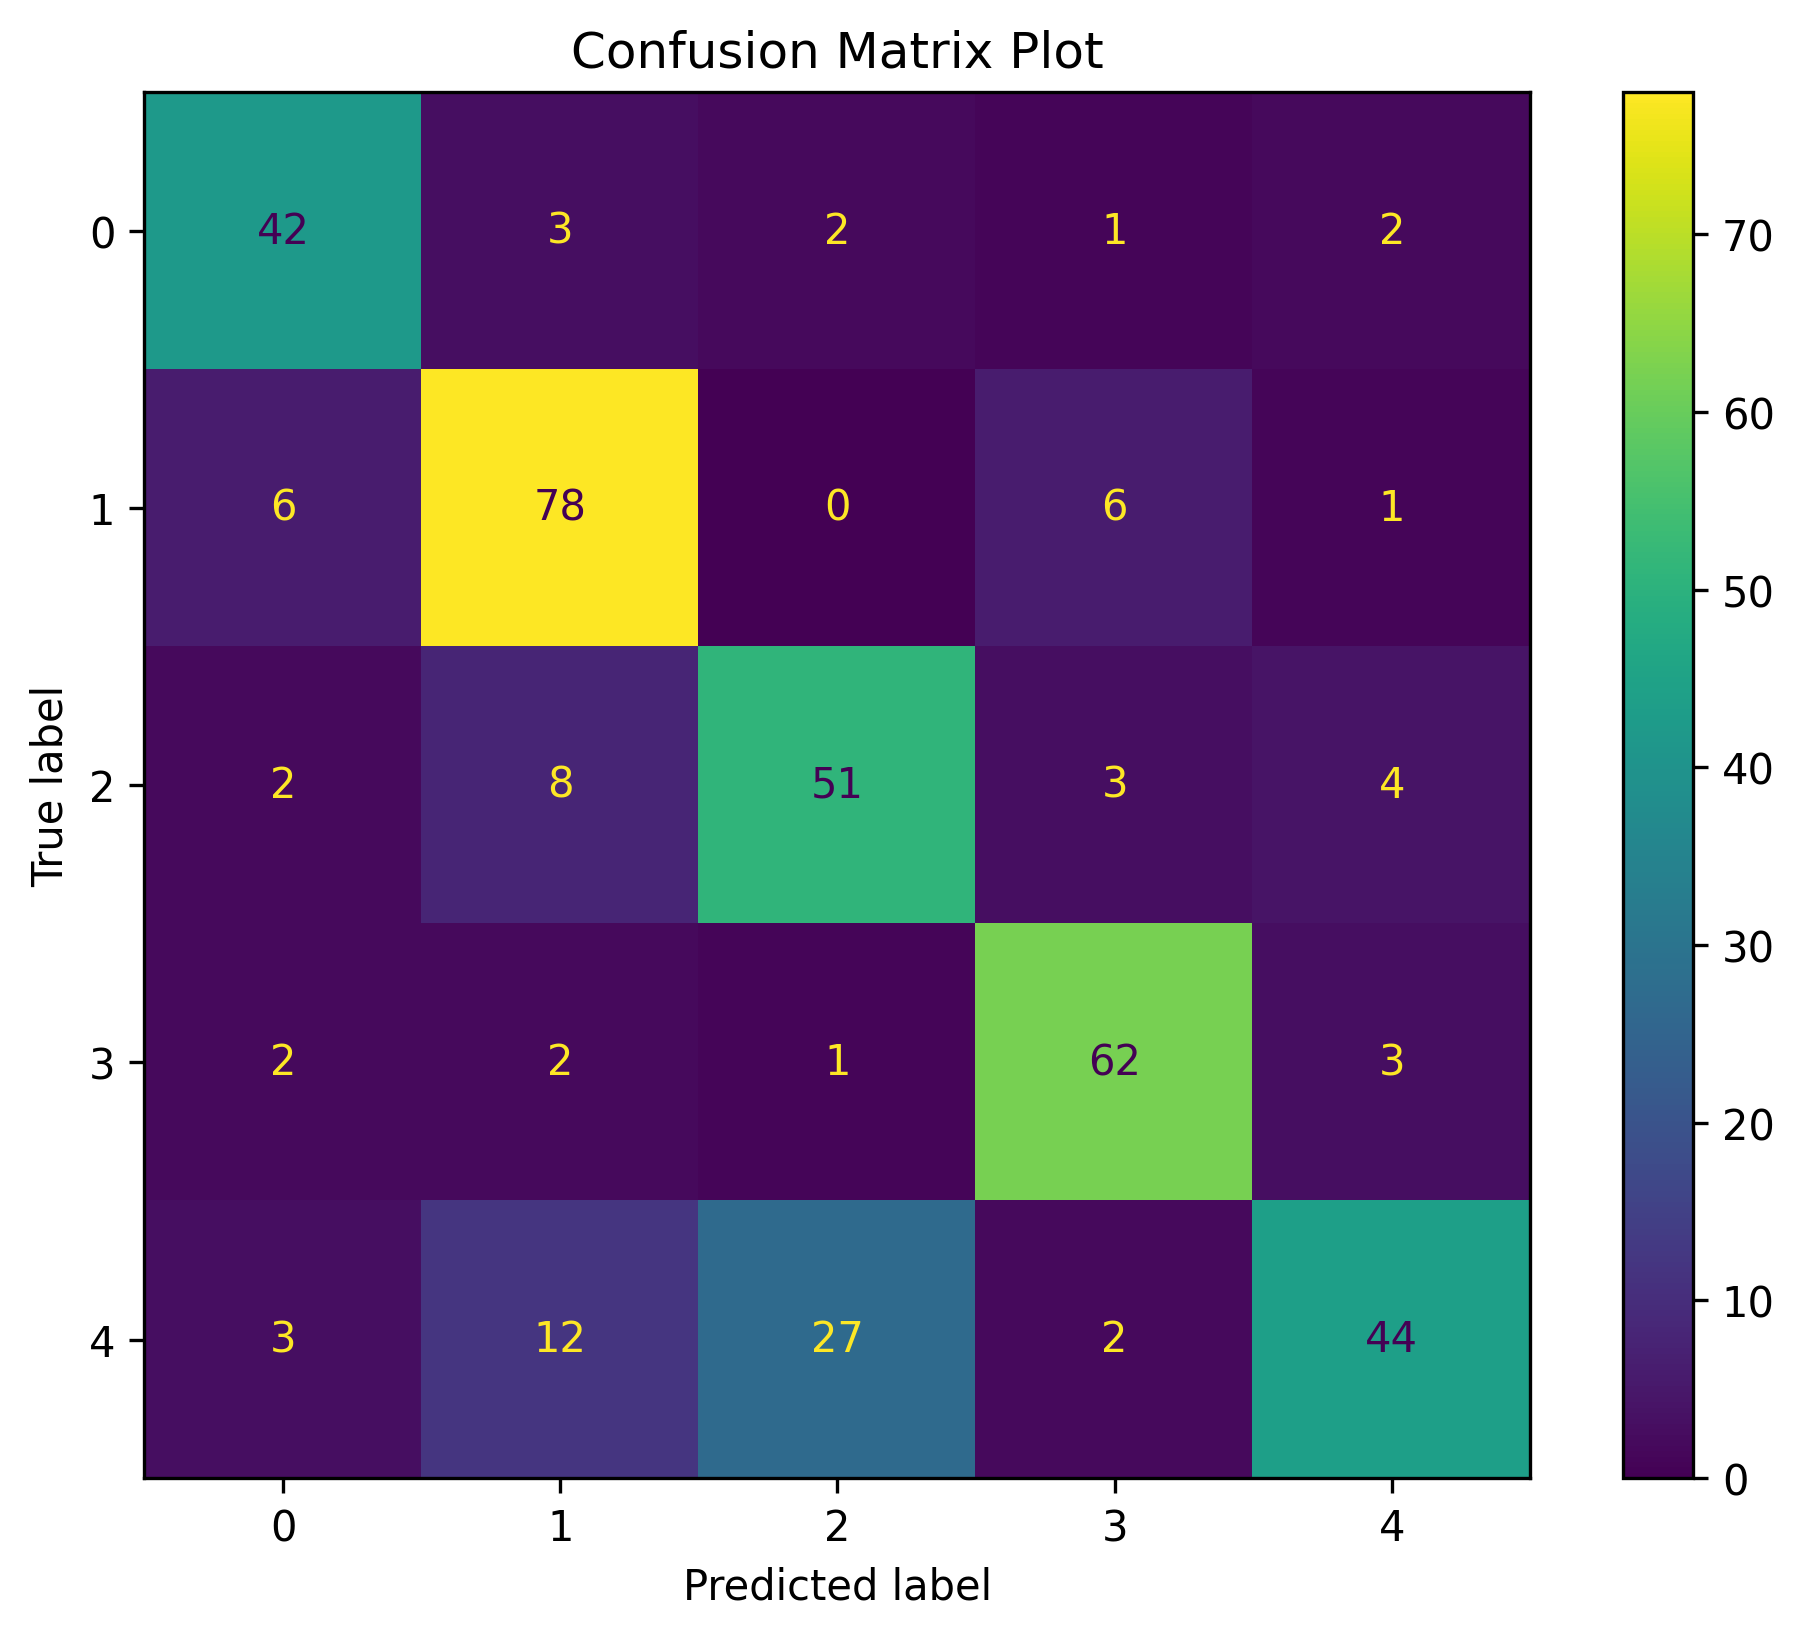

              precision    recall  f1-score   support

           0       0.76      0.84      0.80        50
           1       0.76      0.86      0.80        91
           2       0.63      0.75      0.68        68
           3       0.84      0.89      0.86        70
           4       0.81      0.50      0.62        88

    accuracy                           0.75       367
   macro avg       0.76      0.77      0.75       367
weighted avg       0.76      0.75      0.75       367



In [10]:
batch_size = 32 # 32 batch size
# using the training function with all my parameters.
history = train_and_evaluate(model, batch_size, x_train_norm, y_train_cat, x_test_norm, y_test, train_datagen)


#### Key: 0 = Daisy, 1 = Dandelion, 2 = Roses
####      3 = Sunflowers, 4 = Tulips

# Model 1A

## Hyperparameter Tuning to get the best model prediction accuracy

# Using Batch Size increase to 128

Epoch 1/20
21/21 [==============================] - 54s 2s/step - loss: 0.6927 - accuracy: 0.7317 - val_loss: 0.7103 - val_accuracy: 0.7439
Epoch 2/20
21/21 [==============================] - 51s 2s/step - loss: 0.6473 - accuracy: 0.7556 - val_loss: 0.6952 - val_accuracy: 0.7348
Epoch 3/20
21/21 [==============================] - 54s 3s/step - loss: 0.6457 - accuracy: 0.7582 - val_loss: 0.6993 - val_accuracy: 0.7273
Epoch 4/20
21/21 [==============================] - 54s 3s/step - loss: 0.6413 - accuracy: 0.7510 - val_loss: 0.6814 - val_accuracy: 0.7455
Epoch 5/20
21/21 [==============================] - 53s 3s/step - loss: 0.6235 - accuracy: 0.7631 - val_loss: 0.6980 - val_accuracy: 0.7394
Epoch 6/20
21/21 [==============================] - 52s 2s/step - loss: 0.6253 - accuracy: 0.7753 - val_loss: 0.7131 - val_accuracy: 0.7273
Epoch 7/20
21/21 [==============================] - 52s 2s/step - loss: 0.6225 - accuracy: 0.7681 - val_loss: 0.6955 - val_accuracy: 0.7409
Epoch 8/20
21/21 [==

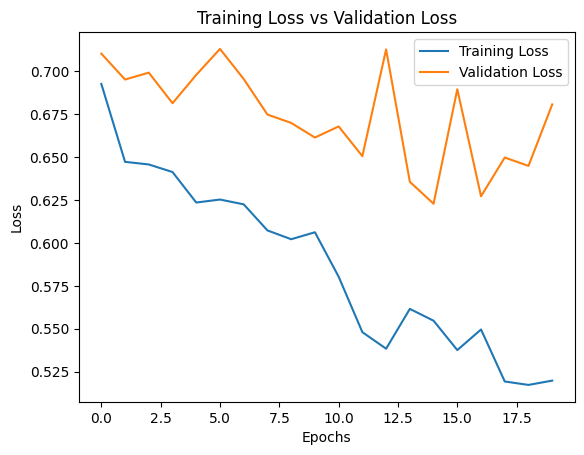

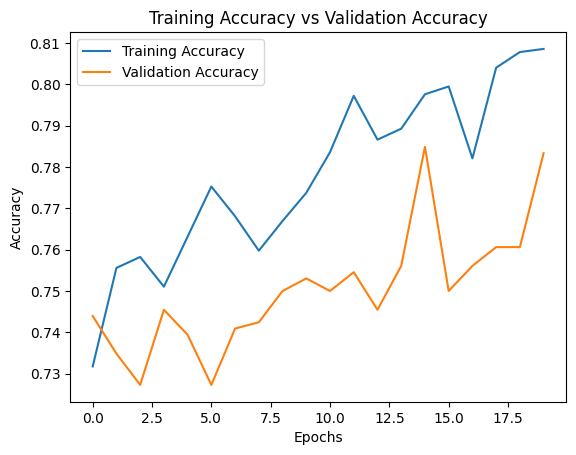

['0', '1', '2', '3', '4']
[0, 1, 2, 3, 4]
12/12 [==============================] - 1s 111ms/step


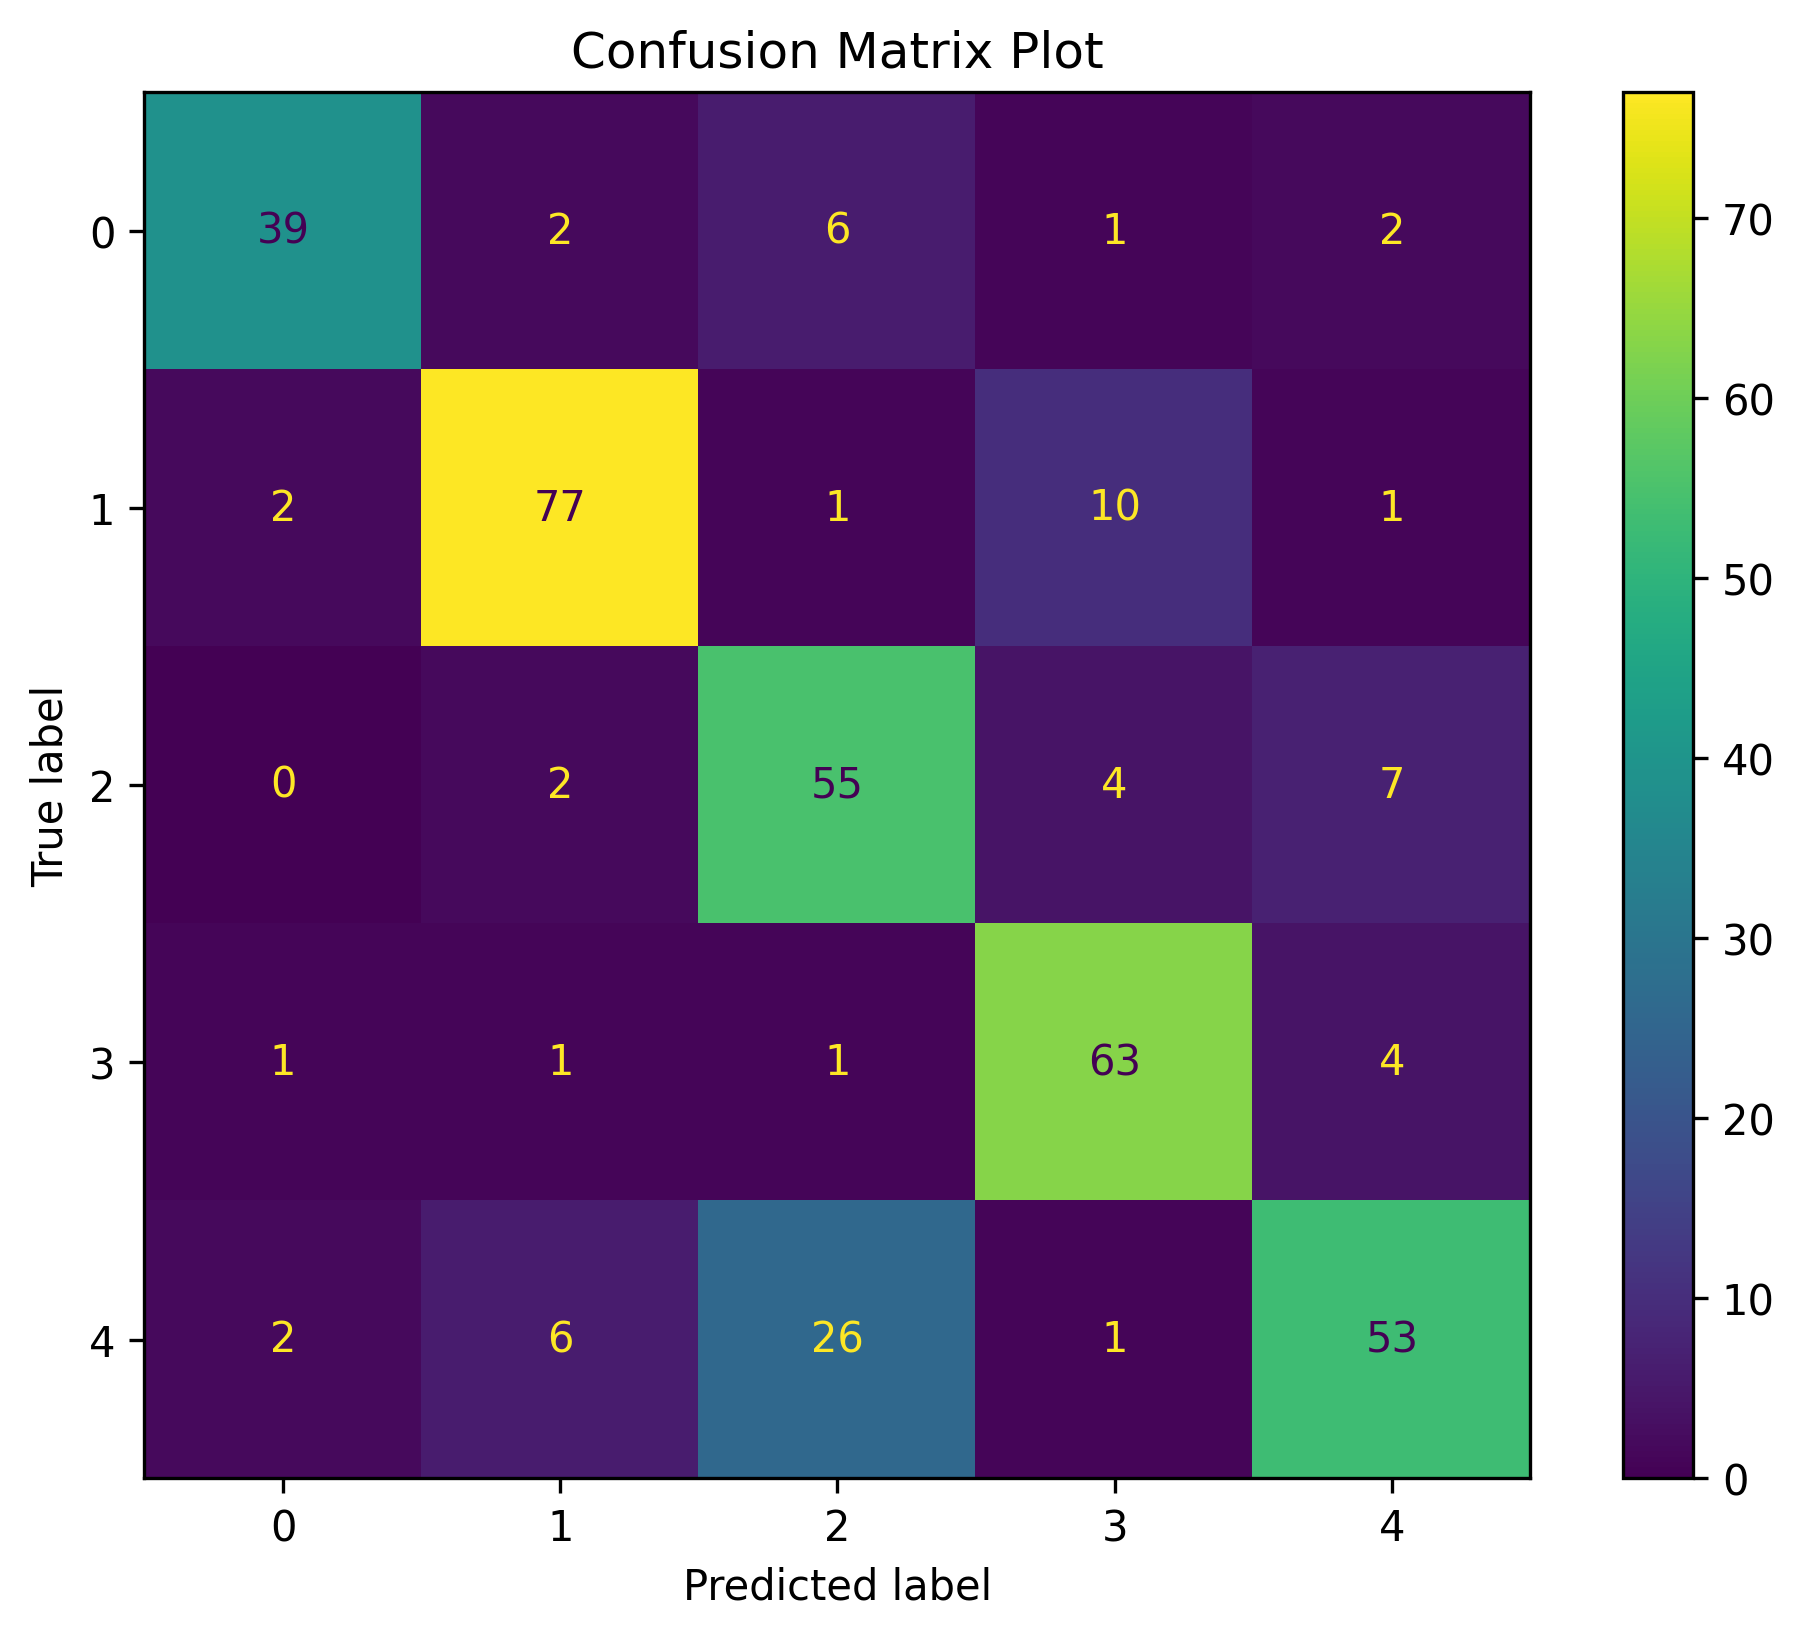

              precision    recall  f1-score   support

           0       0.89      0.78      0.83        50
           1       0.88      0.85      0.86        91
           2       0.62      0.81      0.70        68
           3       0.80      0.90      0.85        70
           4       0.79      0.60      0.68        88

    accuracy                           0.78       367
   macro avg       0.79      0.79      0.78       367
weighted avg       0.79      0.78      0.78       367



In [11]:
# Using batch size 32
batch_size1 = 128
# using the training function with all my parameters.
history = train_and_evaluate(model, batch_size1, x_train_norm, y_train_cat, x_test_norm, y_test, train_datagen)


#### Key: 0 = Daisy, 1 = Dandelion, 2 = Roses
####      3 = Sunflowers, 4 = Tulips

# Model 2

## Adding Stride 2

## Second model 2

In [12]:
# Import the layers that we will require from Tensor Flow.
# Create an instance of the Sequential class.
# our model.
model1 = Sequential()
# Add the first Convolutional layer. Here we use 32 filters,
# which will each be convolved with the input data to
# produce 32 feature maps. We use a kernel_size of 3x3,
# and the relu activation function.
model1.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (2, 2), padding = "same", input_shape = (width_npix,height_npix, 3), activation = 'relu'))
# Add a pooling layer that uses max pooling,
# with a pool size of 2x2.
model1.add(MaxPooling2D(pool_size = (2, 2), padding = "same"))
# Add a second convolutional layer, again with a kernel size of 3x3 and
# the relu activation function but now with 64 filters. 
model1.add(Conv2D(filters = 64, kernel_size = (3, 3), strides = (2, 2), padding = "same", activation = 'relu'))
# Add a second max pooling layer.
model1.add(MaxPooling2D(pool_size = (2, 2), padding = "same"))
# Add a third convolutional layer, now with 128 filters.
model1.add(Conv2D(filters = 128, kernel_size = (3, 3),strides = (2, 2), padding = "same", activation = 'relu'))
# Add a third max pooling layer.
model1.add(MaxPooling2D(pool_size = (2, 2), padding = "same"))
# After the final pooling layer, we need a flatter layer,
# which will flatten the output to a 1-dimensional array,
# ready for the fully connected network.
model1.add(Flatten())
# Add a Dense (i.e. fully connected) layer with 64 neurons
# and the relu activation function.
model1.add(Dense(64, activation = 'relu'))
# Apply a dropout rate of 50% to the dense layer.
model1.add(Dropout(0.5))
# The output layer needs 5 units, corresponding
# to the 5 output classes. 
model1.add(Dense(5, activation = 'softmax'))
# summary of the model.
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 4, 4, 128)        

Epoch 1/20
21/21 [==============================] - 20s 953ms/step - loss: 1.4667 - accuracy: 0.3424 - val_loss: 1.2487 - val_accuracy: 0.4909
Epoch 2/20
21/21 [==============================] - 18s 864ms/step - loss: 1.2665 - accuracy: 0.4332 - val_loss: 1.1570 - val_accuracy: 0.5152
Epoch 3/20
21/21 [==============================] - 18s 863ms/step - loss: 1.2052 - accuracy: 0.4801 - val_loss: 1.0807 - val_accuracy: 0.5621
Epoch 4/20
21/21 [==============================] - 18s 868ms/step - loss: 1.1350 - accuracy: 0.5142 - val_loss: 1.0894 - val_accuracy: 0.5652
Epoch 5/20
21/21 [==============================] - 19s 890ms/step - loss: 1.1110 - accuracy: 0.5308 - val_loss: 1.0106 - val_accuracy: 0.6045
Epoch 6/20
21/21 [==============================] - 18s 867ms/step - loss: 1.0754 - accuracy: 0.5585 - val_loss: 0.9483 - val_accuracy: 0.6424
Epoch 7/20
21/21 [==============================] - 18s 857ms/step - loss: 1.0389 - accuracy: 0.5838 - val_loss: 0.9756 - val_accuracy: 0.6106

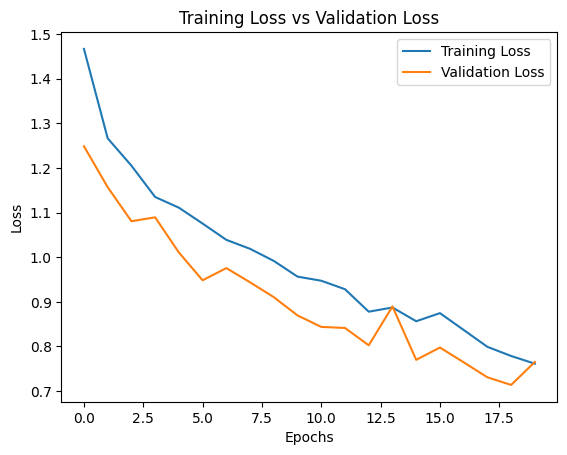

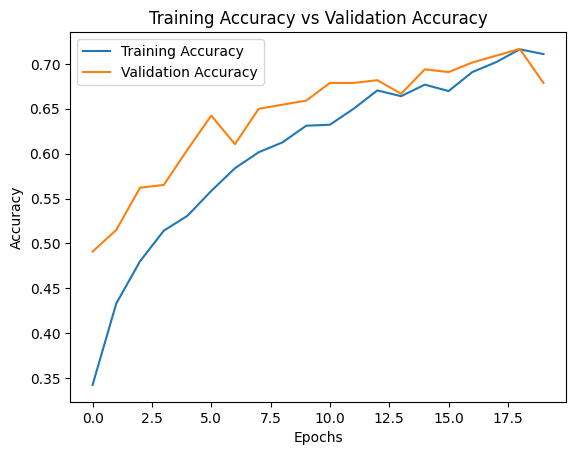

['0', '1', '2', '3', '4']
[0, 1, 2, 3, 4]
12/12 [==============================] - 0s 19ms/step


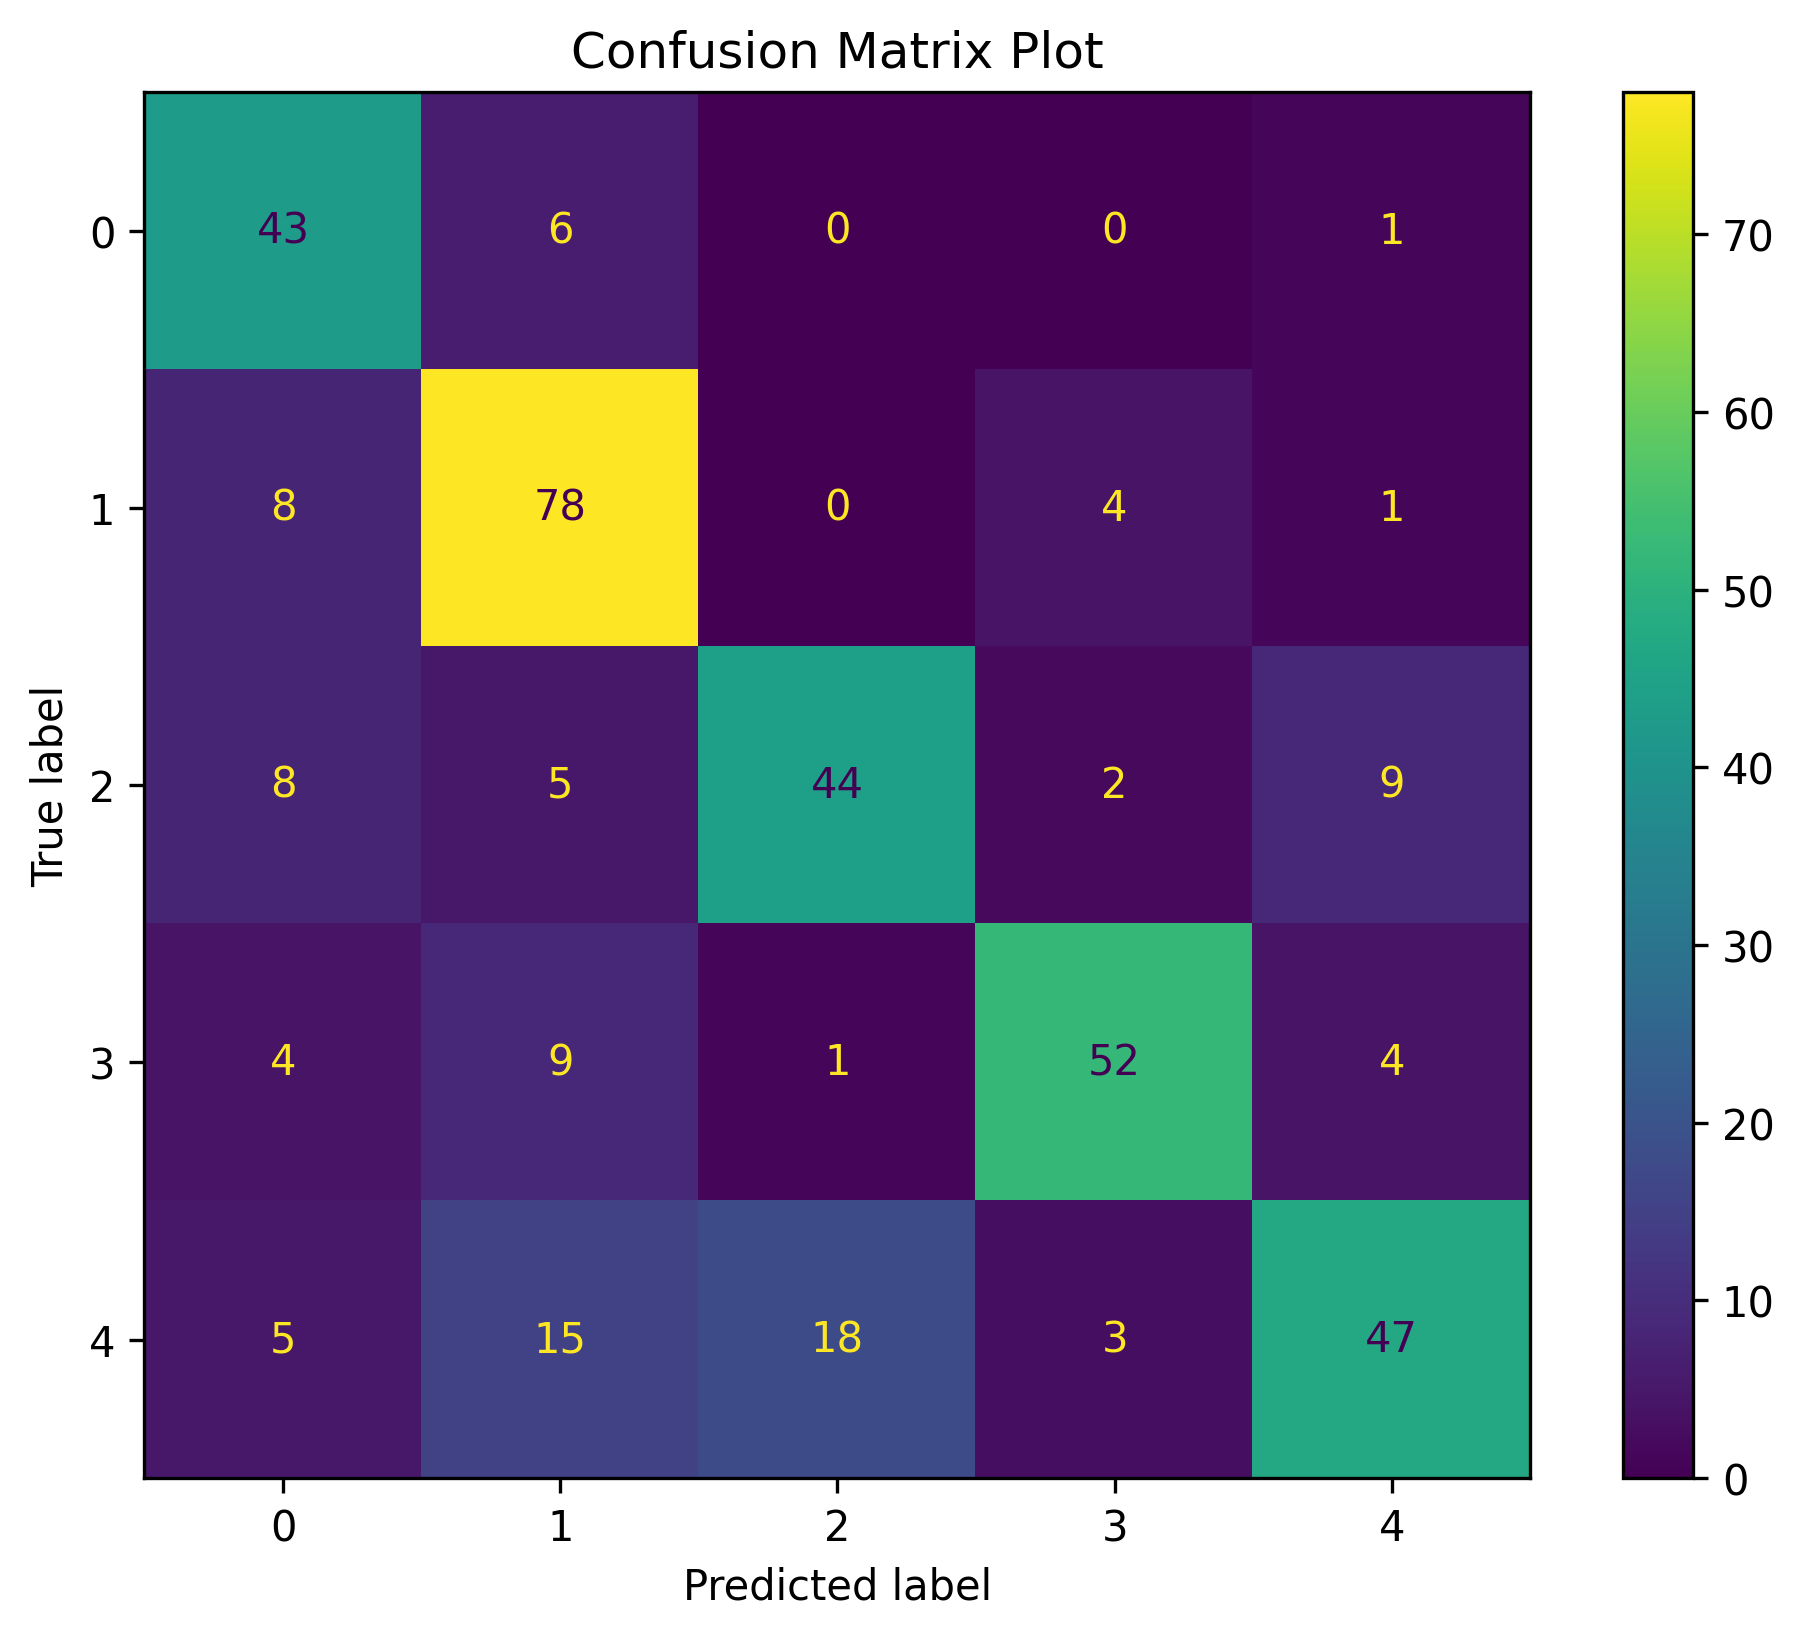

              precision    recall  f1-score   support

           0       0.63      0.86      0.73        50
           1       0.69      0.86      0.76        91
           2       0.70      0.65      0.67        68
           3       0.85      0.74      0.79        70
           4       0.76      0.53      0.63        88

    accuracy                           0.72       367
   macro avg       0.73      0.73      0.72       367
weighted avg       0.73      0.72      0.72       367



In [13]:
# Using batch size 128
batch_size_stride = 128
# using the training function with all my parameters.
history = train_and_evaluate(model1, batch_size_stride, x_train_norm, y_train_cat, x_test_norm, y_test, train_datagen)


#### Key: 0 = Daisy, 1 = Dandelion, 2 = Roses
####      3 = Sunflowers, 4 = Tulips

# Model 3
## Hyper Parameter Increasing Kernel Size to 5,5

In [14]:
# Coments are the same acress board for the model just the Hyper parameter changings

#model
model2 = Sequential()
# produce 32 feature maps. We use a kernel_size of 5 by 5,
model2.add(Conv2D(filters = 32, kernel_size = (5, 5), strides = (2, 2), padding = "same", input_shape = (width_npix,height_npix, 3), activation = 'relu'))

model2.add(MaxPooling2D(pool_size = (2, 2), padding = "same"))
# Add a second convolutional layer, again with a kernel size of 5 by 5 and
model2.add(Conv2D(filters = 64, kernel_size = (5, 5), strides = (2, 2), padding = "same", activation = 'relu'))
# Add a second max pooling layer.
model2.add(MaxPooling2D(pool_size = (2, 2), padding = "same"))
# Add a third convolutional layer, now with 128 filters.
model2.add(Conv2D(filters = 128, kernel_size = (5, 5),strides = (2, 2), padding = "same", activation = 'relu'))
# Add a third max pooling layer.
model2.add(MaxPooling2D(pool_size = (2, 2), padding = "same"))
# After the final pooling layer, we need a flatter layer
model2.add(Flatten())
# Add a Dense (i.e. fully connected) layer with 64 neurons
# and the relu activation function.
model2.add(Dense(64, activation = 'relu'))
# Apply a dropout rate of 50% to the dense layer.
model2.add(Dropout(0.5))

model2.add(Dense(5, activation = 'softmax'))
# summary of the model.
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        51264     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 128)         204928    
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 4, 4, 128)        

Epoch 1/20
21/21 [==============================] - 21s 987ms/step - loss: 1.5333 - accuracy: 0.3012 - val_loss: 1.3279 - val_accuracy: 0.3788
Epoch 2/20
21/21 [==============================] - 21s 1s/step - loss: 1.3117 - accuracy: 0.3935 - val_loss: 1.1970 - val_accuracy: 0.4773
Epoch 3/20
21/21 [==============================] - 21s 968ms/step - loss: 1.2359 - accuracy: 0.4525 - val_loss: 1.1494 - val_accuracy: 0.5348
Epoch 4/20
21/21 [==============================] - 20s 952ms/step - loss: 1.2039 - accuracy: 0.4858 - val_loss: 1.1549 - val_accuracy: 0.5182
Epoch 5/20
21/21 [==============================] - 20s 950ms/step - loss: 1.1653 - accuracy: 0.5100 - val_loss: 1.0700 - val_accuracy: 0.5742
Epoch 6/20
21/21 [==============================] - 20s 953ms/step - loss: 1.1324 - accuracy: 0.5441 - val_loss: 1.0719 - val_accuracy: 0.5682
Epoch 7/20
21/21 [==============================] - 20s 953ms/step - loss: 1.0693 - accuracy: 0.5721 - val_loss: 0.9620 - val_accuracy: 0.6258
Ep

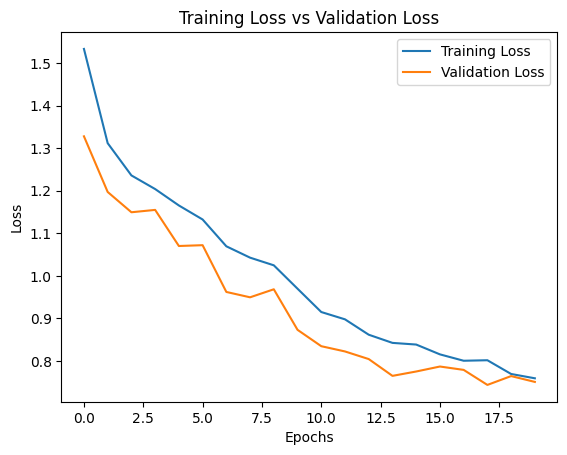

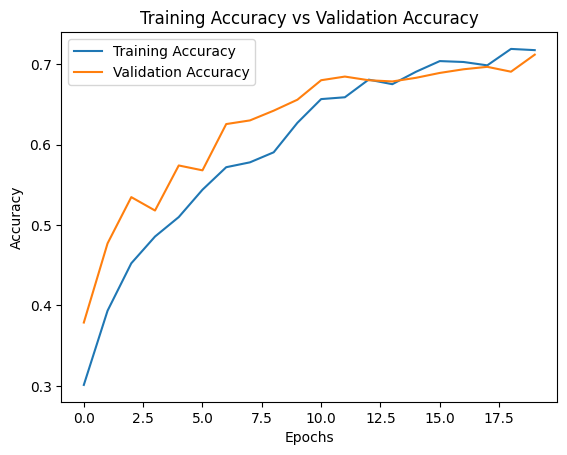

['0', '1', '2', '3', '4']
[0, 1, 2, 3, 4]
12/12 [==============================] - 0s 24ms/step


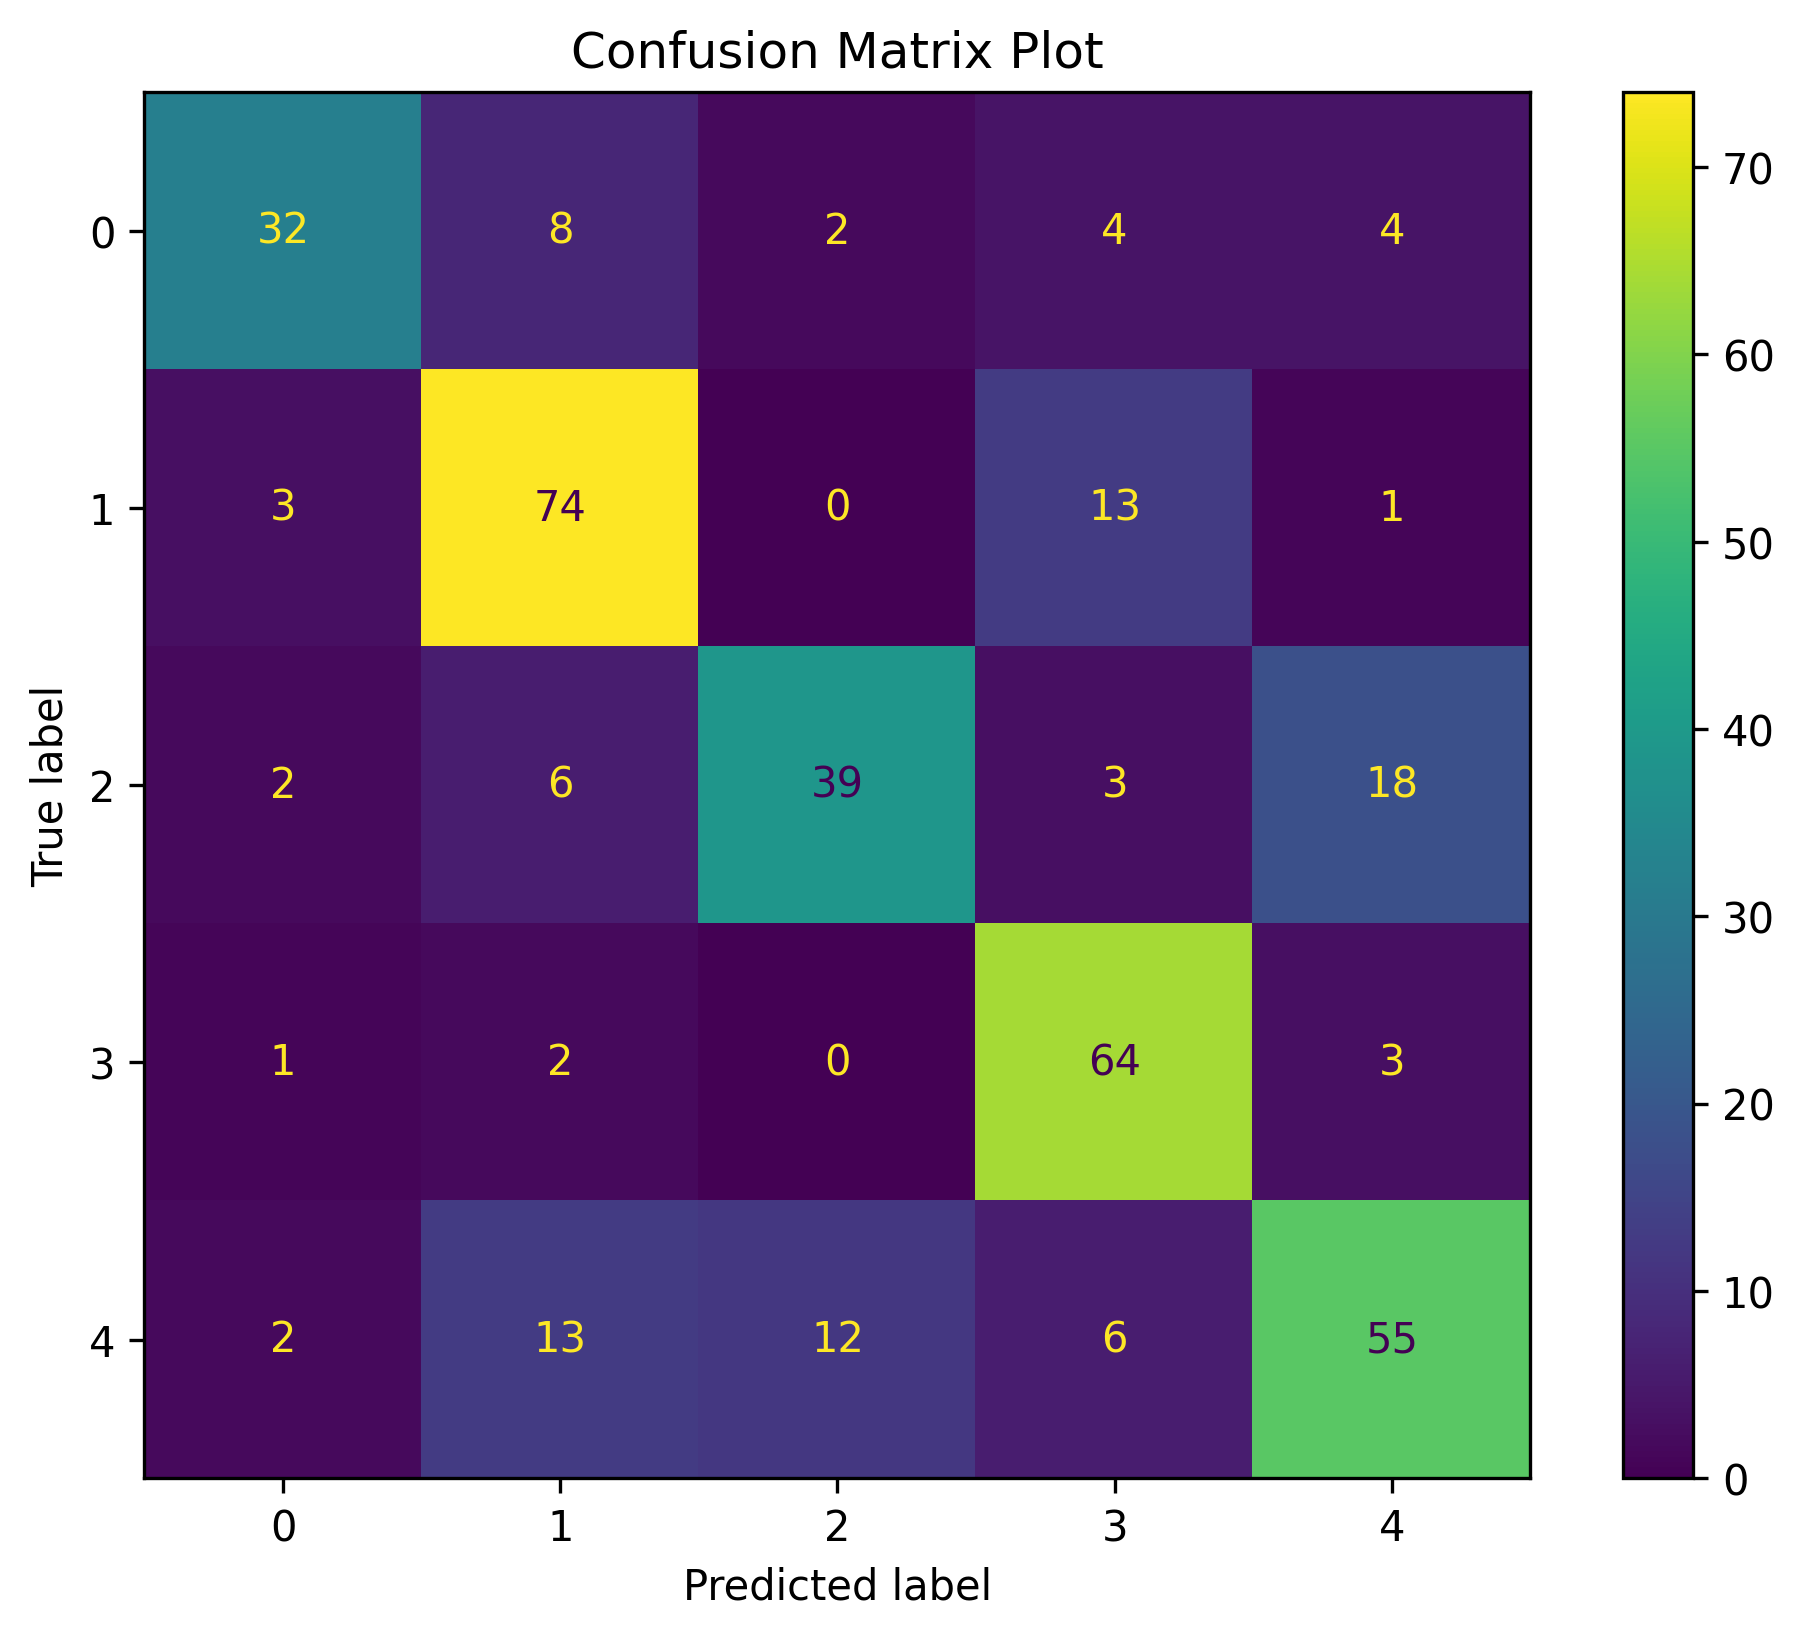

              precision    recall  f1-score   support

           0       0.80      0.64      0.71        50
           1       0.72      0.81      0.76        91
           2       0.74      0.57      0.64        68
           3       0.71      0.91      0.80        70
           4       0.68      0.62      0.65        88

    accuracy                           0.72       367
   macro avg       0.73      0.71      0.71       367
weighted avg       0.72      0.72      0.71       367



In [15]:
# Using batch size 128
batch_size_kenel = 128
# using the training function with all my parameters.
history = train_and_evaluate(model2, batch_size_kenel, x_train_norm, y_train_cat, x_test_norm, y_test, train_datagen)


#### Key: 0 = Daisy, 1 = Dandelion, 2 = Roses
####      3 = Sunflowers, 4 = Tulips

## Model 4
## Hyper Parameter with Average 2d Pooling

In [16]:
# import the AveragePooling2D layer from Keras.
from tensorflow.keras.layers import AveragePooling2D

In [17]:
# Coments are the same acress board for the model just the Hyper parameter changings

model3 = Sequential()
# produce 32 feature maps. We use a kernel_size of 3 by 3,
model3.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (2, 2), padding = "same", input_shape = (width_npix,height_npix, 3), activation = 'relu'))

model3.add(AveragePooling2D(pool_size = (2, 2), padding = "same"))
# Add a second convolutional layer, again with a kernel size of 5 by 5 and
model3.add(Conv2D(filters = 64, kernel_size = (3, 3), strides = (2, 2), padding = "same", activation = 'relu'))
# Add a second max pooling layer.
model3.add(AveragePooling2D(pool_size = (2, 2), padding = "same"))
# Add a third convolutional layer, now with 128 filters.
model3.add(Conv2D(filters = 128, kernel_size = (3, 3),strides = (2, 2), padding = "same", activation = 'relu'))
# Add a third max pooling layer.
model3.add(AveragePooling2D(pool_size = (2, 2), padding = "same"))
# After the final pooling layer, we need a flatter layer
model3.add(Flatten())
# Add a Dense (i.e. fully connected) layer with 64 neurons
# and the relu activation function.
model3.add(Dense(64, activation = 'relu'))
# Apply a dropout rate of 50% to the dense layer.
model3.add(Dropout(0.5))

model3.add(Dense(5, activation = 'softmax'))
# Print a summary of the model.
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 average_pooling2d (Average  (None, 64, 64, 32)        0         
 Pooling2D)                                                      
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 average_pooling2d_1 (Avera  (None, 16, 16, 64)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 128)         73856     
                                                                 
 average_pooling2d_2 (Avera  (None, 4, 4, 128)        

Epoch 1/20
21/21 [==============================] - 19s 867ms/step - loss: 1.5484 - accuracy: 0.2785 - val_loss: 1.3693 - val_accuracy: 0.4197
Epoch 2/20
21/21 [==============================] - 17s 825ms/step - loss: 1.3661 - accuracy: 0.3886 - val_loss: 1.2407 - val_accuracy: 0.4652
Epoch 3/20
21/21 [==============================] - 17s 829ms/step - loss: 1.2756 - accuracy: 0.4510 - val_loss: 1.2054 - val_accuracy: 0.5106
Epoch 4/20
21/21 [==============================] - 19s 886ms/step - loss: 1.2313 - accuracy: 0.4688 - val_loss: 1.1433 - val_accuracy: 0.5515
Epoch 5/20
21/21 [==============================] - 18s 876ms/step - loss: 1.1989 - accuracy: 0.4915 - val_loss: 1.1106 - val_accuracy: 0.5727
Epoch 6/20
21/21 [==============================] - 18s 837ms/step - loss: 1.1762 - accuracy: 0.5115 - val_loss: 1.0844 - val_accuracy: 0.5803
Epoch 7/20
21/21 [==============================] - 18s 859ms/step - loss: 1.1585 - accuracy: 0.5153 - val_loss: 1.0659 - val_accuracy: 0.5758

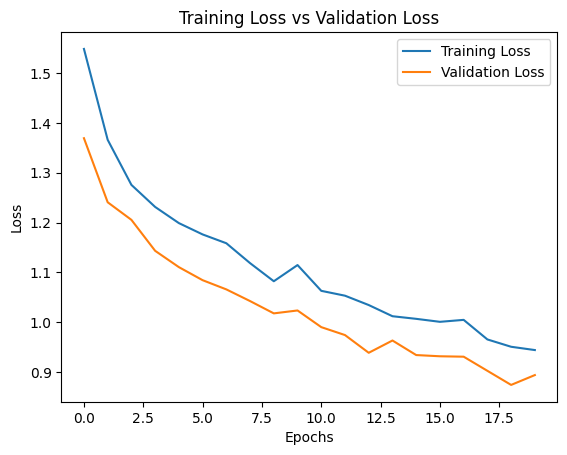

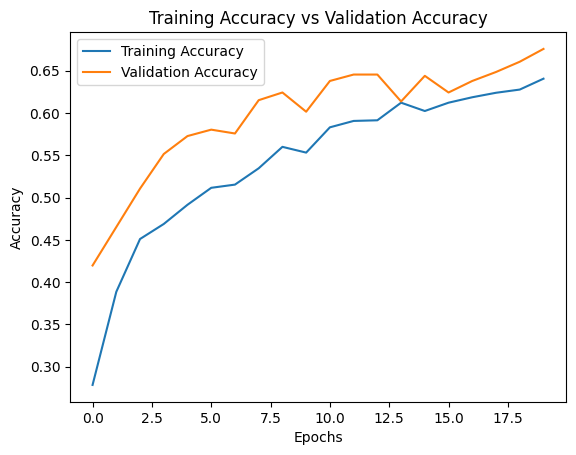

['0', '1', '2', '3', '4']
[0, 1, 2, 3, 4]
12/12 [==============================] - 0s 19ms/step


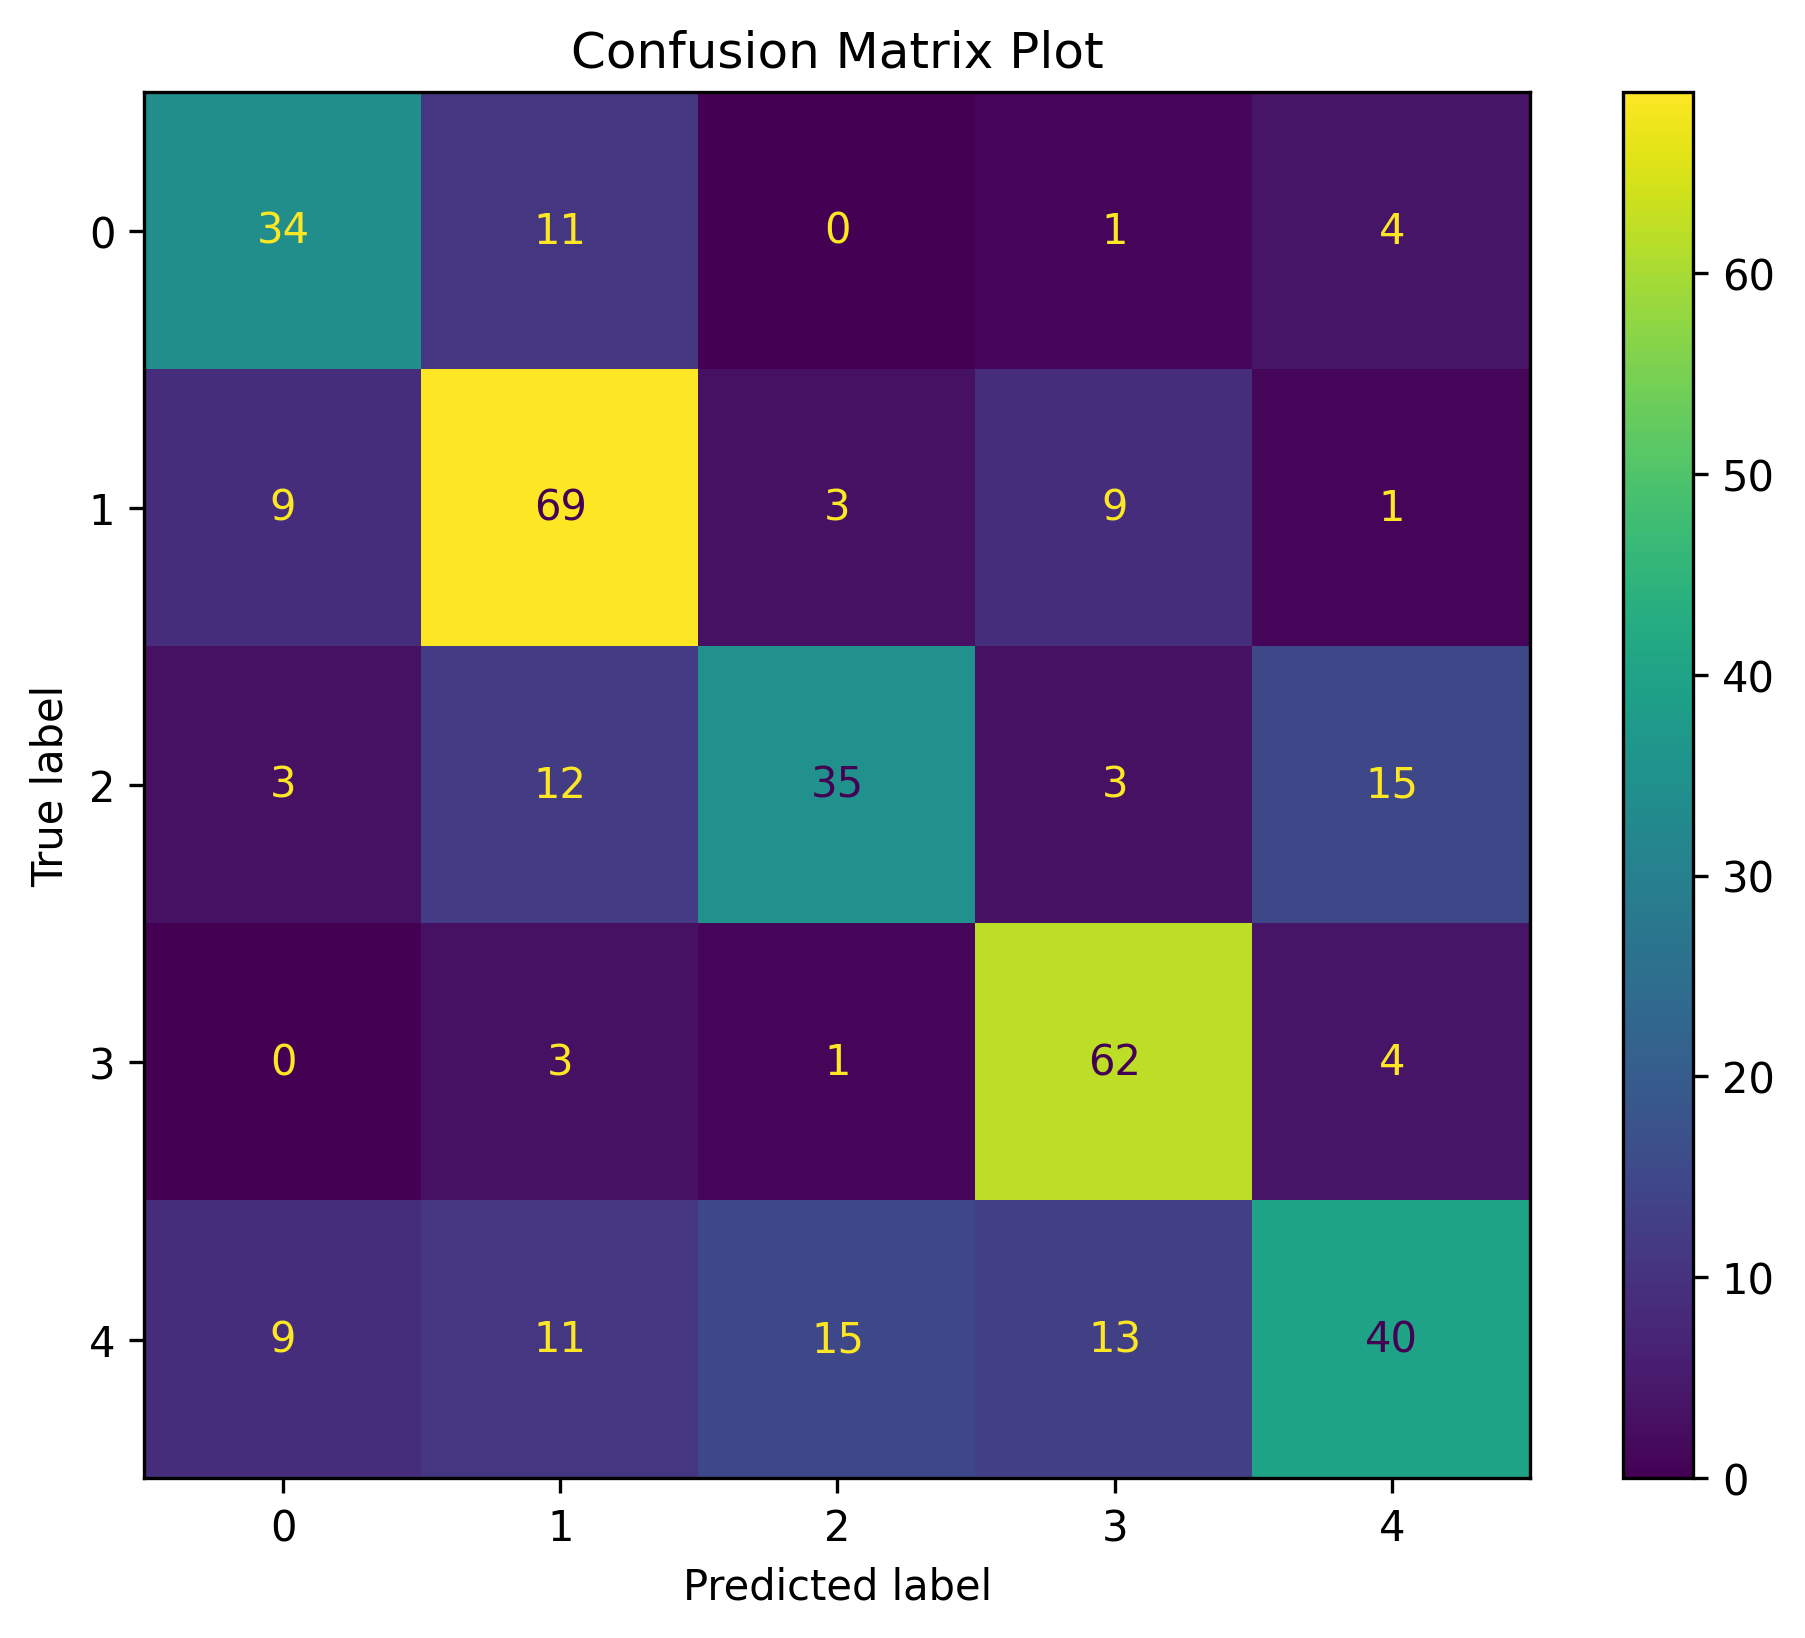

              precision    recall  f1-score   support

           0       0.62      0.68      0.65        50
           1       0.65      0.76      0.70        91
           2       0.65      0.51      0.57        68
           3       0.70      0.89      0.78        70
           4       0.62      0.45      0.53        88

    accuracy                           0.65       367
   macro avg       0.65      0.66      0.65       367
weighted avg       0.65      0.65      0.64       367



In [18]:
# Using batch size 128
batch_size_avg = 128
# using the training function with all my parameters.
history = train_and_evaluate(model3, batch_size_avg, x_train_norm, y_train_cat, x_test_norm, y_test, train_datagen)


#### Key: 0 = Daisy, 1 = Dandelion, 2 = Roses
####      3 = Sunflowers, 4 = Tulips

## Model 5(3 Batch normalization and 3 Average Pooling2D)

# Hyper Parameter Introduce: Batch Normalisation and Average pooling 

In [19]:
# import the BatchNormalization layer from Keras.
from tensorflow.keras.layers import BatchNormalization


In [20]:
model4 = Sequential()
# Add the first Convolutional layer. Here we use 32 filters,
# which will each be convolved with the input data to
# produce 32 feature maps. We use a kernel_size of 3x3,
# and the relu activation function.
model4.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (2, 2), padding = "same", input_shape = (width_npix,height_npix, 3), activation = 'relu'))
# Add a pooling layer that uses max pooling,
# with a pool size of 2x2.
model4.add(AveragePooling2D(pool_size = (2, 2), padding = "same"))
# Add a second convolutional layer, again with a kernel size of 3x3 and
# Apply Batch normalisation to the pooling layer. In this
# example we have set the momentum parameter to 0.9. If it is
# too large, the results can become quite noisy.
model4.add(BatchNormalization(momentum = 0.9))

model4.add(Conv2D(filters = 64, kernel_size = (3, 3), strides = (2, 2), padding = "same", activation = 'relu'))
# Add a second max pooling layer.
model4.add(AveragePooling2D(pool_size = (2, 2), padding = "same"))
# Add a third convolutional layer, now with 128 filters.
# Apply Batch normalisation to the pooling layer. 
# momentum parameter to 0.9. 
model4.add(BatchNormalization(momentum = 0.9))

model4.add(Conv2D(filters = 128, kernel_size = (3, 3),strides = (2, 2), padding = "same", activation = 'relu'))
# Add a third max pooling layer.
model4.add(AveragePooling2D(pool_size = (2, 2), padding = "same"))
# After the final pooling layer, we need a flatter layer,
# which will flatten the output to a 1-dimensional array,
# ready for the fully connected network.

# Batch normalisation to the pooling layer. 
model4.add(BatchNormalization(momentum = 0.9))

model4.add(Flatten())
# Add a Dense (i.e. fully connected) layer with 64 neurons
# and the relu activation function.
model4.add(Dense(64, activation = 'relu'))
# Apply a dropout rate of 50% to the dense layer.
model4.add(Dropout(0.5))
# The output layer needs 5 units, corresponding
# to the 5 output classes. We use the softmax
# activation function, which means the resulting
# output values will represent the probabilities
# for each of the 5 class labels.
model4.add(Dense(5, activation = 'softmax'))
# Print a summary of the model.
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 average_pooling2d_3 (Avera  (None, 64, 64, 32)        0         
 gePooling2D)                                                    
                                                                 
 batch_normalization (Batch  (None, 64, 64, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 average_pooling2d_4 (Avera  (None, 16, 16, 64)        0         
 gePooling2D)                                                    
                                                      

Epoch 1/20
21/21 [==============================] - 19s 911ms/step - loss: 1.6889 - accuracy: 0.4033 - val_loss: 1.3878 - val_accuracy: 0.3970
Epoch 2/20
21/21 [==============================] - 18s 865ms/step - loss: 1.3307 - accuracy: 0.5047 - val_loss: 1.2375 - val_accuracy: 0.4682
Epoch 3/20
21/21 [==============================] - 18s 868ms/step - loss: 1.2419 - accuracy: 0.5225 - val_loss: 1.0587 - val_accuracy: 0.5652
Epoch 4/20
21/21 [==============================] - 18s 867ms/step - loss: 1.1546 - accuracy: 0.5630 - val_loss: 0.9753 - val_accuracy: 0.6045
Epoch 5/20
21/21 [==============================] - 18s 870ms/step - loss: 1.0816 - accuracy: 0.5883 - val_loss: 0.9790 - val_accuracy: 0.6030
Epoch 6/20
21/21 [==============================] - 18s 871ms/step - loss: 1.0419 - accuracy: 0.6020 - val_loss: 0.9747 - val_accuracy: 0.6182
Epoch 7/20
21/21 [==============================] - 18s 861ms/step - loss: 0.9964 - accuracy: 0.6277 - val_loss: 0.9796 - val_accuracy: 0.6333

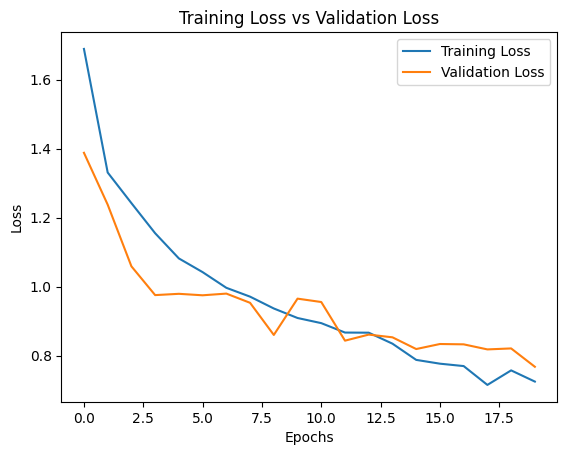

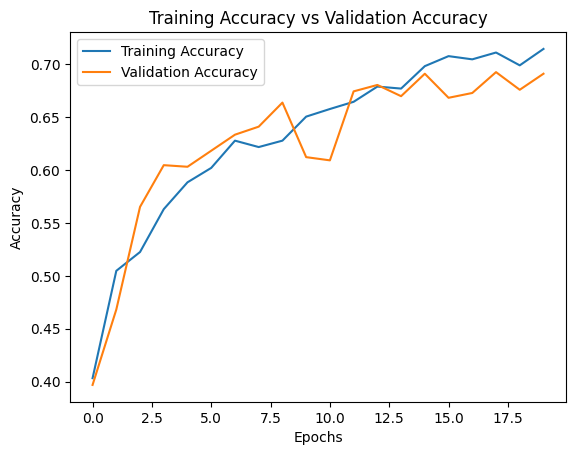

['0', '1', '2', '3', '4']
[0, 1, 2, 3, 4]
12/12 [==============================] - 0s 21ms/step


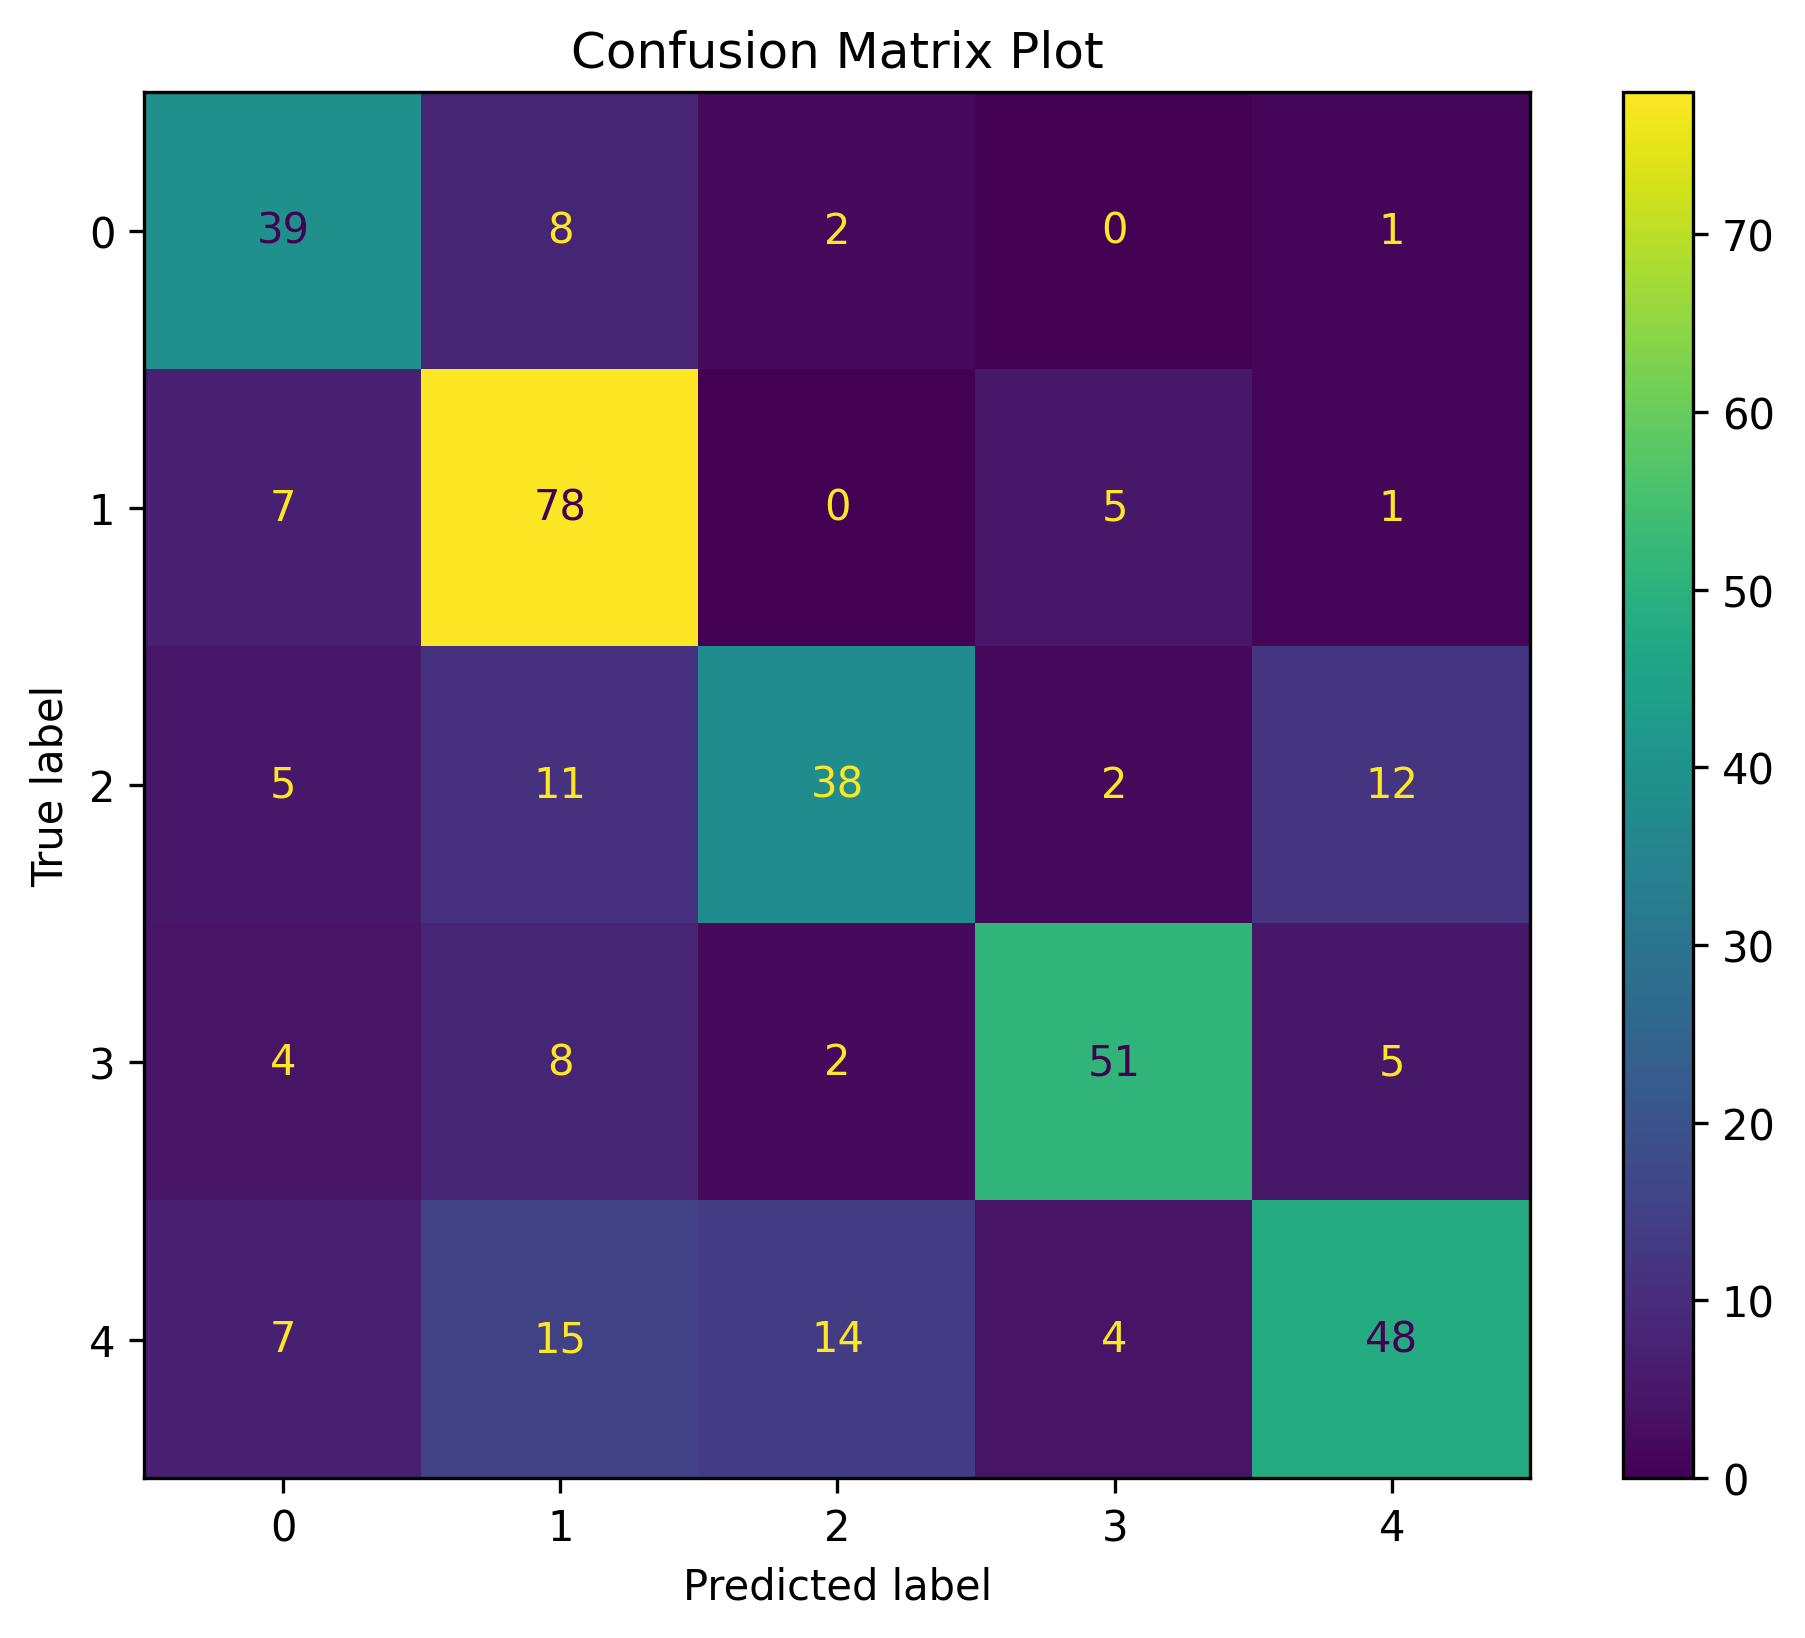

              precision    recall  f1-score   support

           0       0.63      0.78      0.70        50
           1       0.65      0.86      0.74        91
           2       0.68      0.56      0.61        68
           3       0.82      0.73      0.77        70
           4       0.72      0.55      0.62        88

    accuracy                           0.69       367
   macro avg       0.70      0.69      0.69       367
weighted avg       0.70      0.69      0.69       367



In [21]:
# Using batch size 128
batch_size_bnorm = 128
# using the training function with all my parameters.
history = train_and_evaluate(model4, batch_size_bnorm, x_train_norm, y_train_cat, x_test_norm, y_test, train_datagen)


#### Key: 0 = Daisy, 1 = Dandelion, 2 = Roses
####      3 = Sunflowers, 4 = Tulips

# Model 5A
# Comparing using Kernel Size = 5 and  Batch Size = 128

In [22]:

model5 = Sequential()
# Add the first Convolutional layer. Here we use 32 filters,
# which will each be convolved with the input data to
# produce 32 feature maps. We use a kernel_size of 3x3,
# and the relu activation function.
model5.add(Conv2D(filters = 32, kernel_size = (5, 5), input_shape = (width_npix,height_npix, 3), activation = 'relu'))
# Add a pooling layer that uses max pooling,
# with a pool size of 2x2.
model5.add(MaxPooling2D(pool_size = (2, 2)))
# Add a second convolutional layer, again with a kernel size of 3x3 and
# the relu activation function but now with 64 filters.
model5.add(Conv2D(filters = 64, kernel_size = (5, 5), activation = 'relu'))
# Add a second max pooling layer.
model5.add(MaxPooling2D(pool_size = (2, 2)))
# Add a third convolutional layer, now with 128 filters.
model5.add(Conv2D(filters = 128, kernel_size = (5, 5), activation = 'relu'))
# Add a third max pooling layer.
model5.add(MaxPooling2D(pool_size = (2, 2)))
# After the final pooling layer, we need a flatter layer,
model5.add(Flatten())
# Add a Dense (i.e. fully connected) layer with 64 neurons
# and the relu activation function.
model5.add(Dense(64, activation = 'relu'))
# Apply a dropout rate of 50% to the dense layer.
model5.add(Dropout(0.5))
# The output layer needs 5 units, corresponding
# to the 5 output classes. 
model5.add(Dense(5, activation = 'softmax'))
# Print a summary of the model.
model5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 252, 252, 32)      2432      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 126, 126, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 122, 122, 64)      51264     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 61, 61, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 57, 57, 128)       204928    
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 28, 28, 128)      

Epoch 1/20
21/21 [==============================] - 87s 4s/step - loss: 1.6579 - accuracy: 0.2804 - val_loss: 1.4074 - val_accuracy: 0.3833
Epoch 2/20
21/21 [==============================] - 82s 4s/step - loss: 1.3786 - accuracy: 0.3912 - val_loss: 1.2519 - val_accuracy: 0.4318
Epoch 3/20
21/21 [==============================] - 81s 4s/step - loss: 1.2690 - accuracy: 0.4434 - val_loss: 1.1913 - val_accuracy: 0.5167
Epoch 4/20
21/21 [==============================] - 82s 4s/step - loss: 1.2189 - accuracy: 0.4703 - val_loss: 1.0944 - val_accuracy: 0.5697
Epoch 5/20
21/21 [==============================] - 82s 4s/step - loss: 1.1792 - accuracy: 0.5112 - val_loss: 1.0771 - val_accuracy: 0.5652
Epoch 6/20
21/21 [==============================] - 83s 4s/step - loss: 1.1377 - accuracy: 0.5312 - val_loss: 1.0226 - val_accuracy: 0.6030
Epoch 7/20
21/21 [==============================] - 83s 4s/step - loss: 1.0824 - accuracy: 0.5672 - val_loss: 1.0443 - val_accuracy: 0.5652
Epoch 8/20
21/21 [==

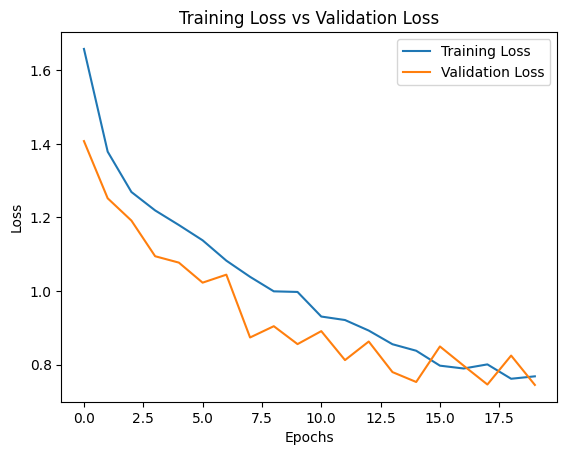

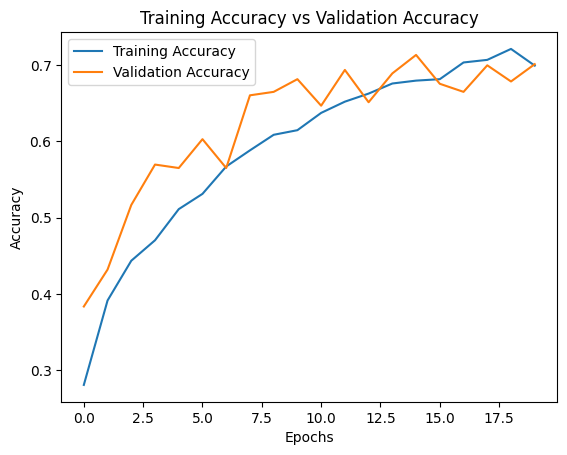

['0', '1', '2', '3', '4']
[0, 1, 2, 3, 4]
12/12 [==============================] - 2s 183ms/step


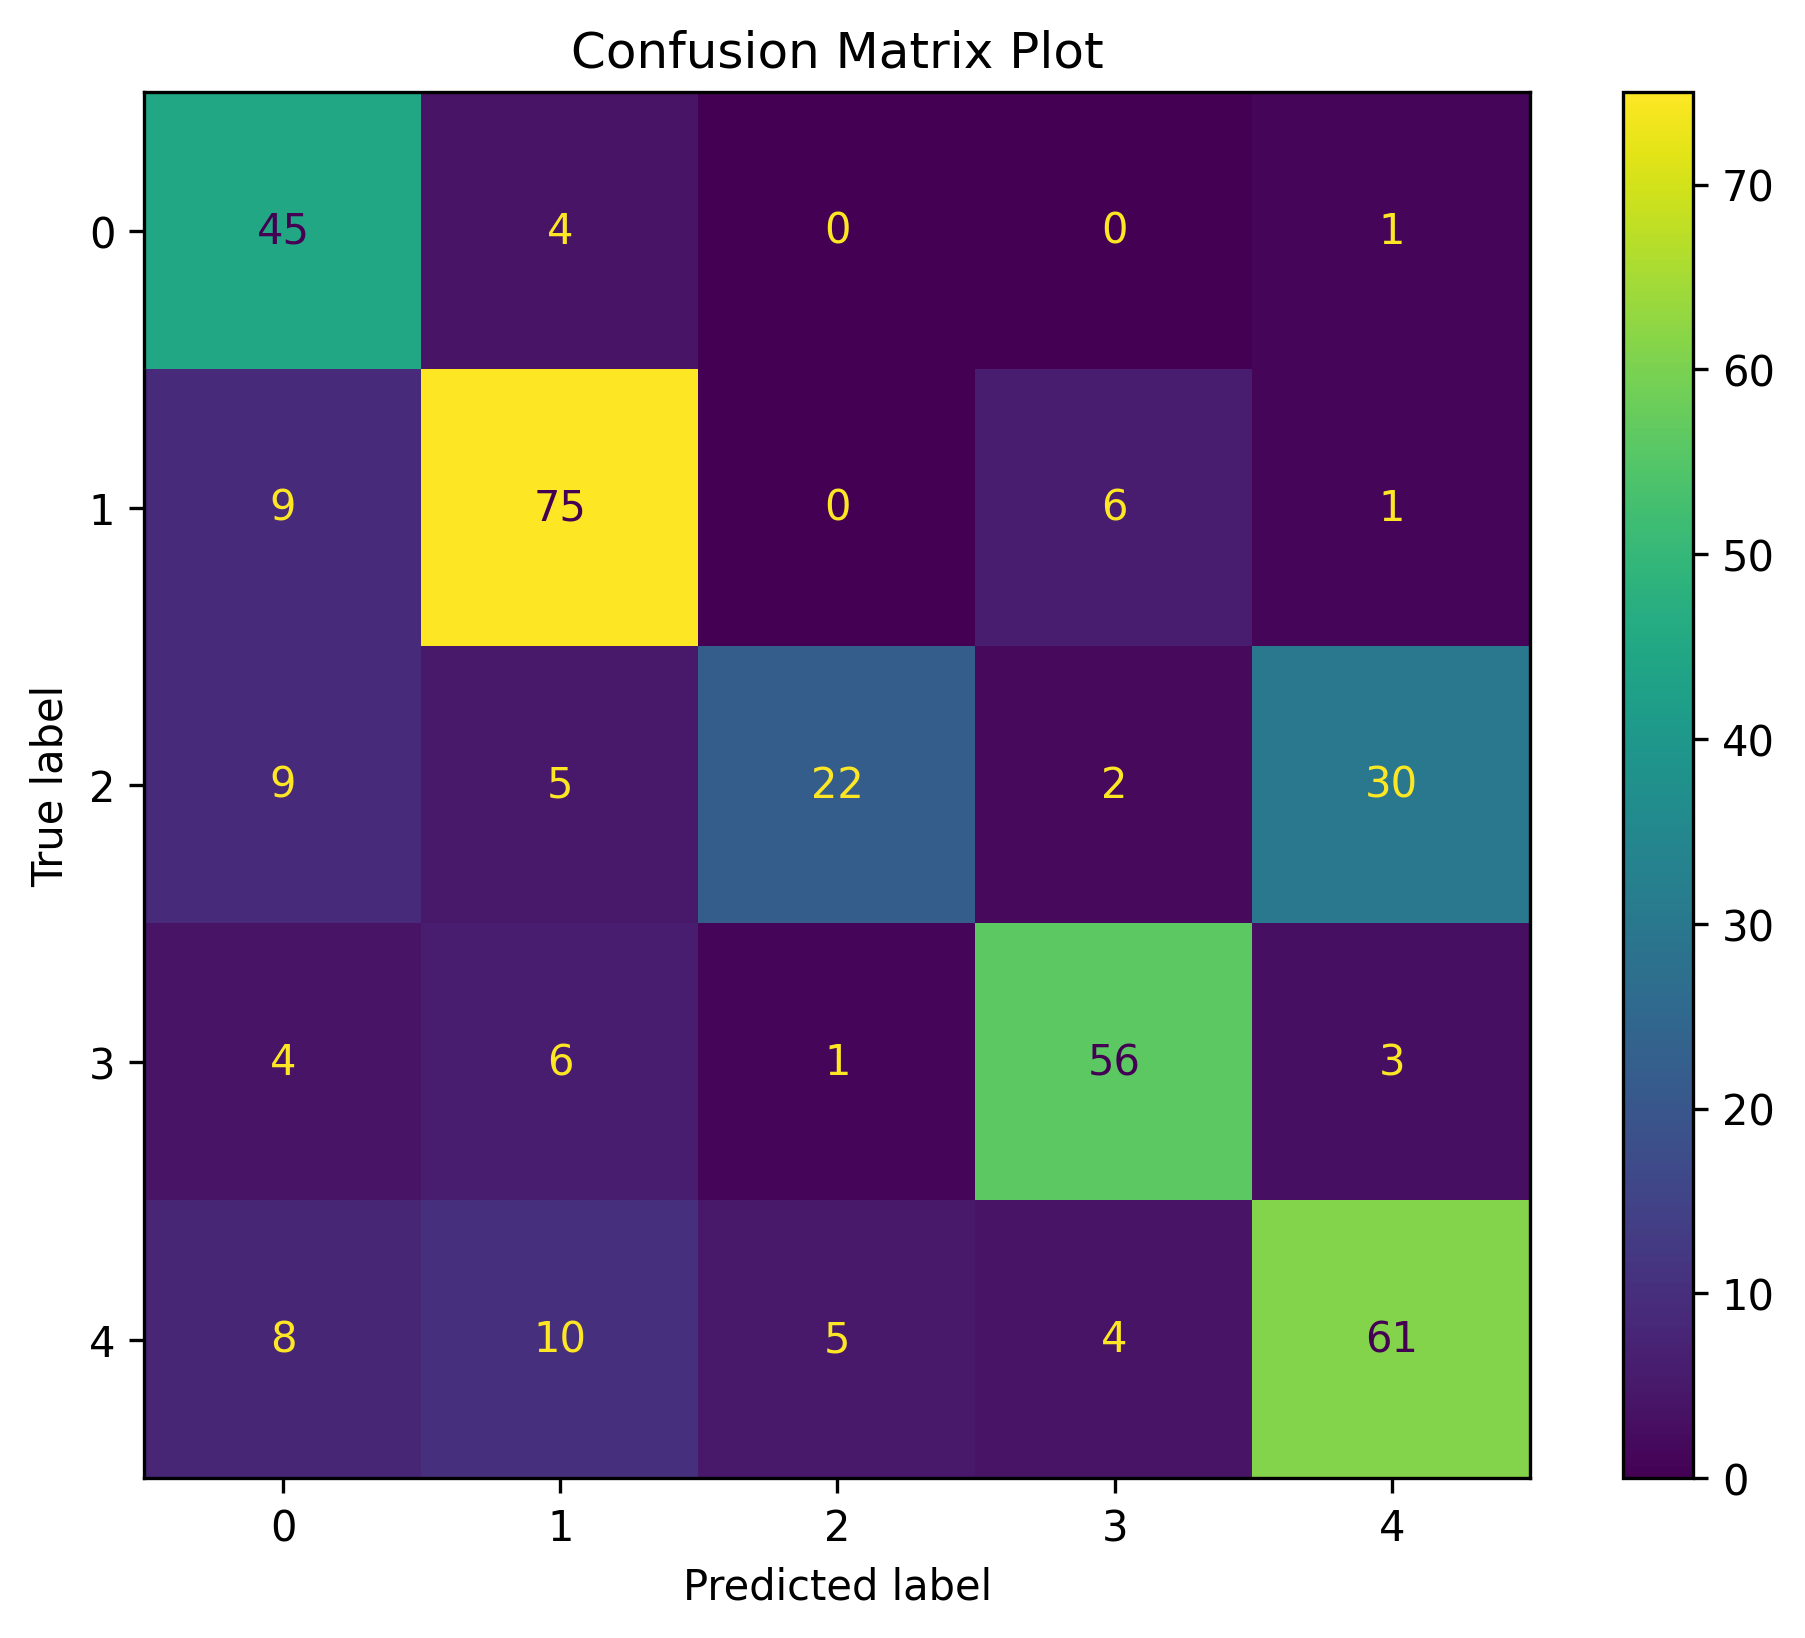

              precision    recall  f1-score   support

           0       0.60      0.90      0.72        50
           1       0.75      0.82      0.79        91
           2       0.79      0.32      0.46        68
           3       0.82      0.80      0.81        70
           4       0.64      0.69      0.66        88

    accuracy                           0.71       367
   macro avg       0.72      0.71      0.69       367
weighted avg       0.72      0.71      0.69       367



In [23]:
# Using batch size 128
batch_size_model5 = 128
# using the training function with all my parameters.
history = train_and_evaluate(model5, batch_size_model5, x_train_norm, y_train_cat, x_test_norm, y_test, train_datagen)


#### Key: 0 = Daisy, 1 = Dandelion, 2 = Roses
####      3 = Sunflowers, 4 = Tulips

## Model 6 
## Batch Normalization and kernel 3

In [24]:

model6 = Sequential()
# Add the first Convolutional layer. Here we use 32 filters,
# which will each be convolved with the input data to
# produce 32 feature maps. We use a kernel_size of 3x3,
# and the relu activation function.
model6.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (width_npix,height_npix, 3), activation = 'relu'))
# Add a pooling layer that uses max pooling,
# with a pool size of 2x2.
model6.add(MaxPooling2D(pool_size = (2, 2)))
model6.add(BatchNormalization(momentum = 0.9))

# Add a second convolutional layer, again with a kernel size of 3x3 and
# the relu activation function but now with 64 filters.
model6.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
# Add a second max pooling layer.
model6.add(MaxPooling2D(pool_size = (2, 2)))
model6.add(BatchNormalization(momentum = 0.9))

# Add a third convolutional layer, now with 128 filters.
model6.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
# Add a third max pooling layer.
model6.add(MaxPooling2D(pool_size = (2, 2)))
model6.add(BatchNormalization(momentum = 0.9))

# After the final pooling layer, we need a flatter layer,

model6.add(Flatten())
# Add a Dense (i.e. fully connected) layer with 64 neurons
# and the relu activation function.
model6.add(Dense(64, activation = 'relu'))
# Apply a dropout rate of 50% to the dense layer.
model6.add(Dropout(0.5))
# The output layer needs 5 units, corresponding
# to the 5 output classes.
model6.add(Dense(5, activation = 'softmax'))
# Print a summary of the model.
model6.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 batch_normalization_3 (Bat  (None, 127, 127, 32)      128       
 chNormalization)                                                
                                                                 
 conv2d_19 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                      

Epoch 1/20
21/21 [==============================] - 62s 3s/step - loss: 10.5852 - accuracy: 0.3787 - val_loss: 9.7404 - val_accuracy: 0.2500
Epoch 2/20
21/21 [==============================] - 57s 3s/step - loss: 6.3082 - accuracy: 0.3156 - val_loss: 2.8985 - val_accuracy: 0.3652
Epoch 3/20
21/21 [==============================] - 57s 3s/step - loss: 4.0704 - accuracy: 0.3568 - val_loss: 2.6551 - val_accuracy: 0.3985
Epoch 4/20
21/21 [==============================] - 56s 3s/step - loss: 4.0659 - accuracy: 0.3712 - val_loss: 3.1775 - val_accuracy: 0.4227
Epoch 5/20
21/21 [==============================] - 57s 3s/step - loss: 3.1791 - accuracy: 0.3837 - val_loss: 2.9351 - val_accuracy: 0.4303
Epoch 6/20
21/21 [==============================] - 56s 3s/step - loss: 2.9794 - accuracy: 0.3791 - val_loss: 2.4288 - val_accuracy: 0.4333
Epoch 7/20
21/21 [==============================] - 56s 3s/step - loss: 2.6753 - accuracy: 0.3977 - val_loss: 2.0883 - val_accuracy: 0.4530
Epoch 8/20
21/21 [=

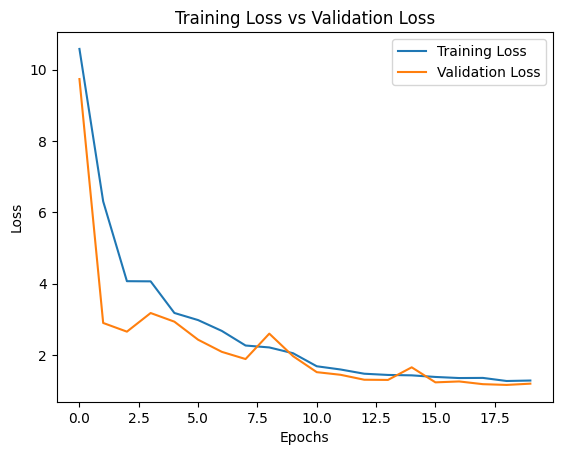

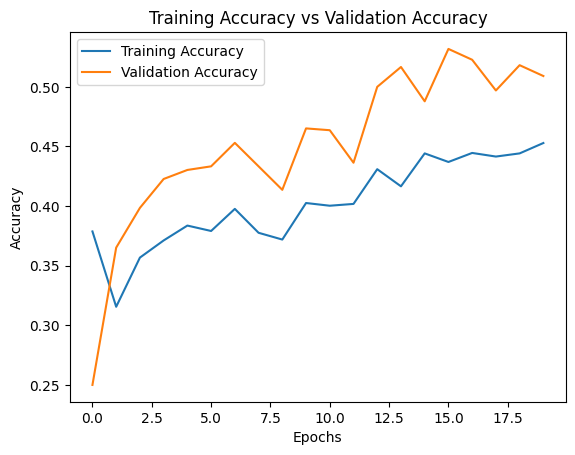

['0', '1', '2', '3', '4']
[0, 1, 2, 3, 4]
12/12 [==============================] - 2s 126ms/step


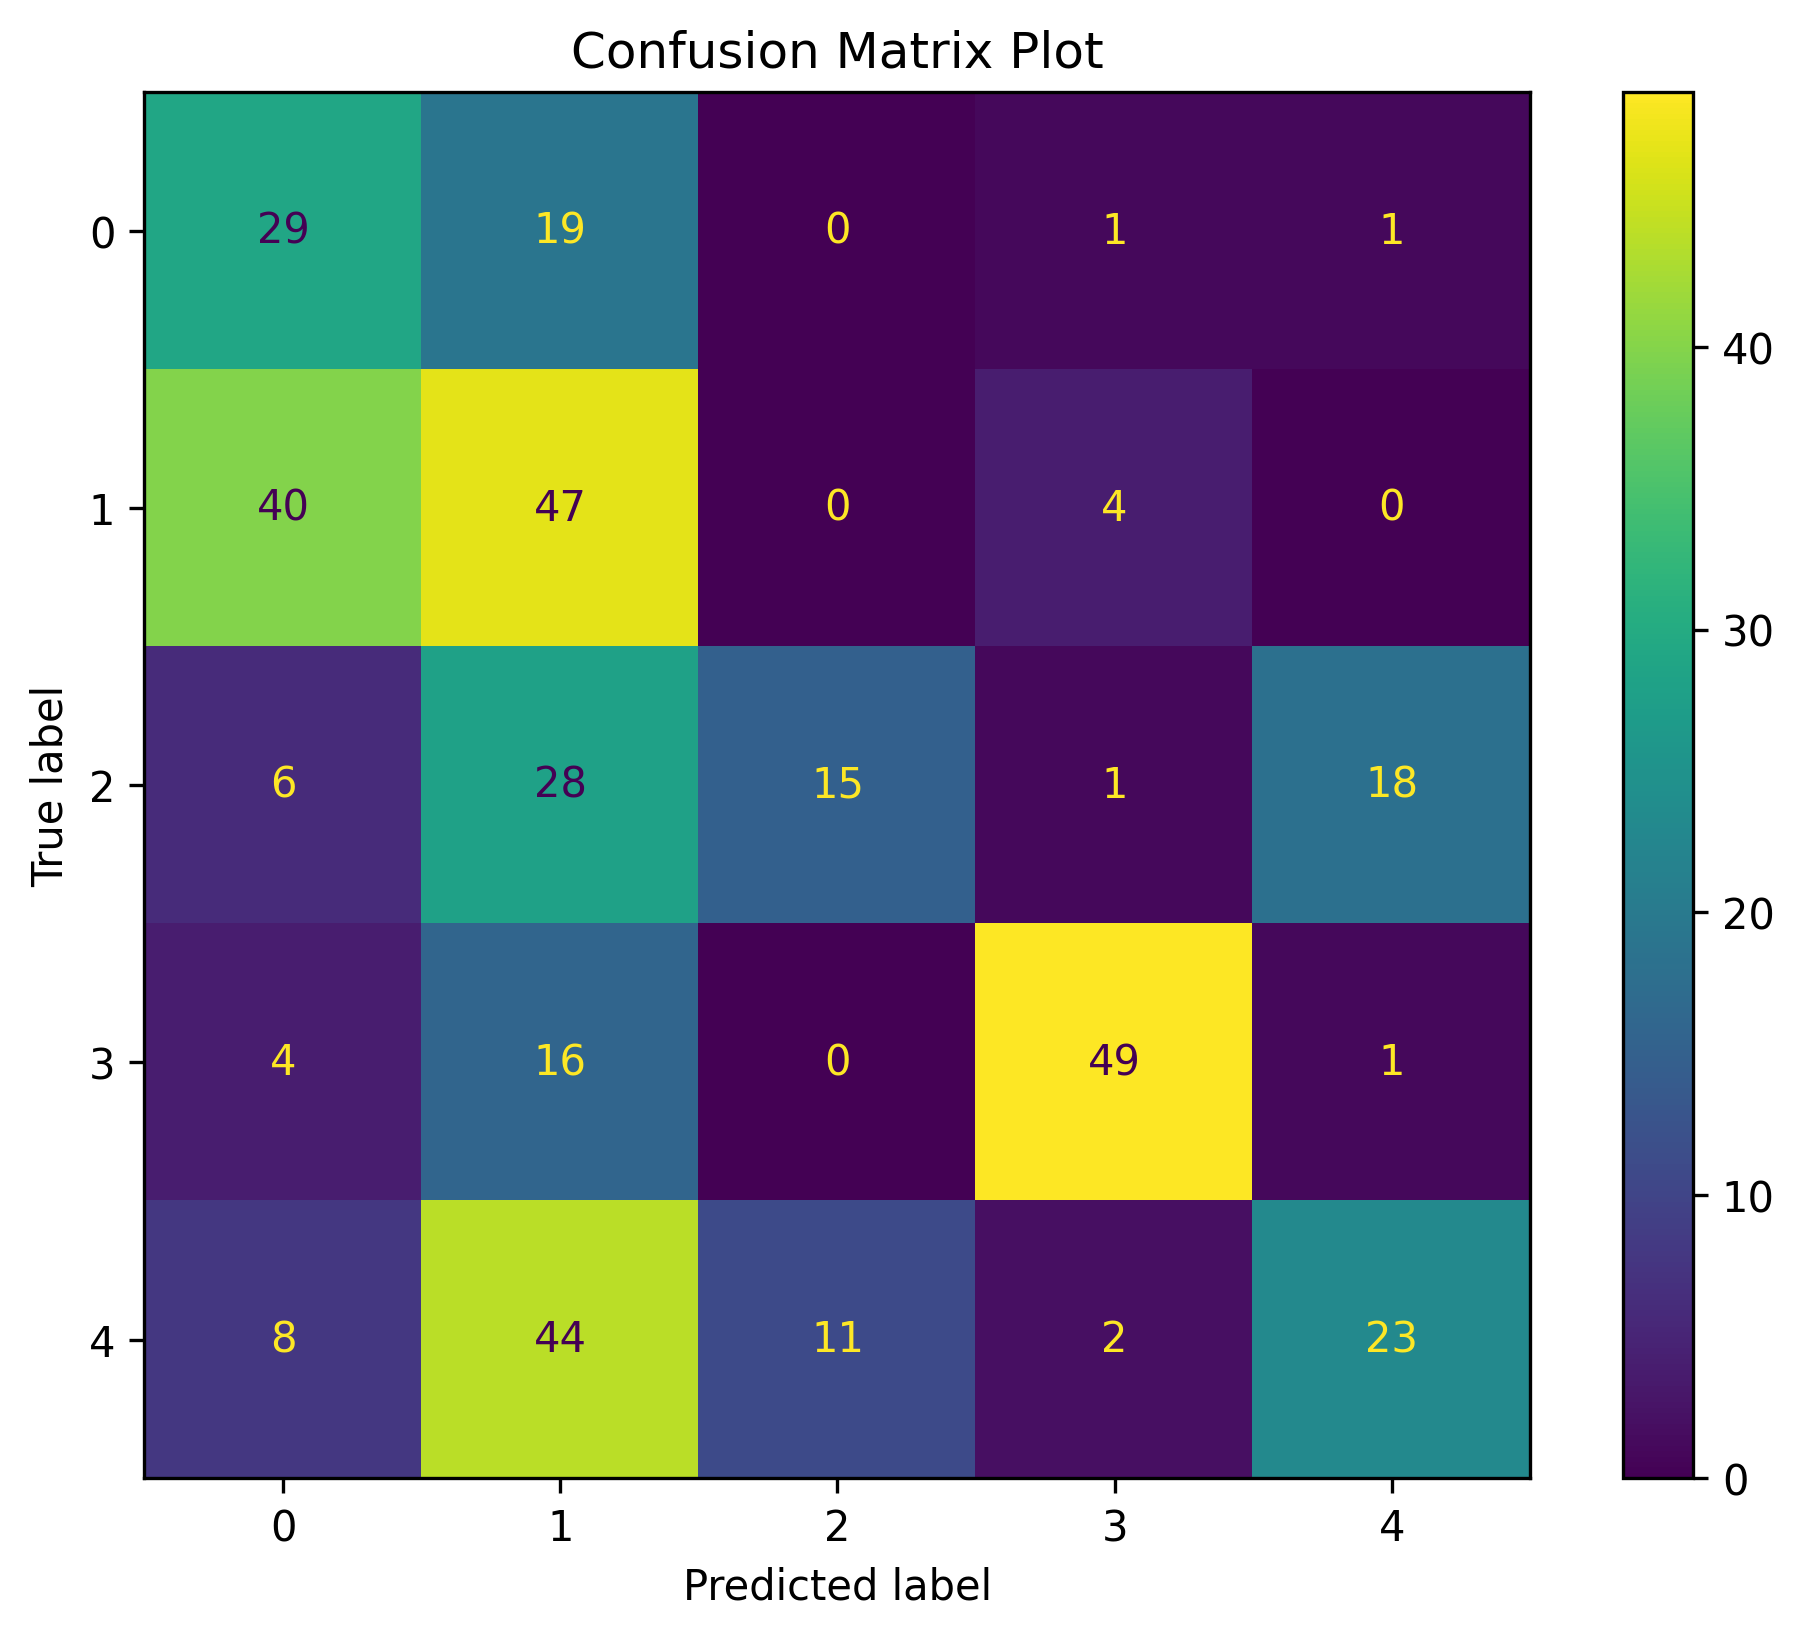

              precision    recall  f1-score   support

           0       0.33      0.58      0.42        50
           1       0.31      0.52      0.38        91
           2       0.58      0.22      0.32        68
           3       0.86      0.70      0.77        70
           4       0.53      0.26      0.35        88

    accuracy                           0.44       367
   macro avg       0.52      0.46      0.45       367
weighted avg       0.52      0.44      0.44       367



In [25]:
# Using batch size 128
batch_size_model6 = 128
# using the training function with all my parameters.
history = train_and_evaluate(model6, batch_size_model6, x_train_norm, y_train_cat, x_test_norm, y_test, train_datagen)


#### Key: 0 = Daisy, 1 = Dandelion, 2 = Roses
####      3 = Sunflowers, 4 = Tulips

## From all the CNN Models and hyper parameter tunning, Model 1a with 128 Batch number is the best model with a 78% accurate prediction result